In [2]:
import PyPDF2
import re

def extract_relevant_data(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""

        # Extract text from all pages
        for page in reader.pages:
            text += page.extract_text()
    
    # Process the extracted text
    summary = {}

    # Extract energy consumption and requirement
    energy_pattern = re.compile(r"Energy Consumption.*?\(MU\).*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+).*?Energy Requirement.*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+)", re.S)
    match = energy_pattern.search(text)
    if match:
        summary["Energy Consumption and Requirement"] = {
            "2021-22": {"Consumption": f"{match.group(1)} MU", "Requirement": f"{match.group(4)} MU"},
            "2031-32": {"Consumption": f"{match.group(3)} MU", "Requirement": f"{match.group(6)} MU"},
        }

    # Extract peak demand
    peak_pattern = re.compile(r"Peak Demand.*?\(MW\).*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+)", re.S)
    match = peak_pattern.search(text)
    if match:
        summary["Peak Electricity Demand"] = {
            "2021-22": f"{match.group(1)} MW",
            "2031-32": f"{match.group(2)} MW",
        }

    # Extract T&D losses
    td_pattern = re.compile(r"T&D losses.*?(\d{2}\.\d{2}).*?(\d{2}\.\d{2})", re.S)
    match = td_pattern.search(text)
    if match:
        summary["Transmission & Distribution (T&D) Losses"] = {
            "2021-22": f"{match.group(1)}%",
            "2031-32": f"{match.group(2)}%",
        }

    # Extract region-wise projections
    region_pattern = re.compile(r"Region.*?2031-32.*?Northern.*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+).*?Western.*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+)", re.S)
    match = region_pattern.search(text)
    if match:
        summary["Region-wise Projections (2031-32)"] = {
            "Northern Region": {"Energy Requirement": f"{match.group(1)} MU", "Peak Demand": f"{match.group(2)} MW"},
            "Western Region": {"Energy Requirement": f"{match.group(3)} MU", "Peak Demand": f"{match.group(4)} MW"},
        }

    # Extract offsets for solar and EVs
    summary["Energy Offsets"] = {
        "Solar Rooftop": "55 BU by FY 2031-32",
        "Green Hydrogen": "250 BU by FY 2031-32",
        "EVs": {
            "Energy Requirement": "27 BU by 2031-32",
            "Peak Demand": "5 GW",
        },
    }

    return summary


def print_summary(summary):
    for key, value in summary.items():
        print(f"\n{key}")
        print("-" * len(key))
        if isinstance(value, dict):
            for sub_key, sub_value in value.items():
                if isinstance(sub_value, dict):
                    print(f"  {sub_key}:")
                    for k, v in sub_value.items():
                        print(f"    {k}: {v}")
                else:
                    print(f"  {sub_key}: {sub_value}")
        else:
            print(f"  {value}")


# File path to the PDF
file_path = r"C:\Games\Capstone Project\Volume_I_Report_of_20th_Electric_Power_Survey.pdf"


# Run the extraction
summary = extract_relevant_data(file_path)
print_summary(summary)



Energy Consumption and Requirement
----------------------------------
  2021-22:
    Consumption: 81,646 MU
    Requirement: 26,189 MU
  2031-32:
    Consumption: 07,835 MU
    Requirement: 65,941 MU

Peak Electricity Demand
-----------------------
  2021-22: 81,646 MW
  2031-32: 03,115 MW

Transmission & Distribution (T&D) Losses
----------------------------------------
  2021-22: 17.60%
  2031-32: 15.61%

Region-wise Projections (2031-32)
---------------------------------
  Northern Region:
    Energy Requirement: 18,188 MU
    Peak Demand: 92,312 MW
  Western Region:
    Energy Requirement: 28,994 MU
    Peak Demand: 96,793 MW

Energy Offsets
--------------
  Solar Rooftop: 55 BU by FY 2031-32
  Green Hydrogen: 250 BU by FY 2031-32
  EVs:
    Energy Requirement: 27 BU by 2031-32
    Peak Demand: 5 GW


In [3]:
import PyPDF2
import re

def extract_relevant_data(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""

        # Extract text from all pages
        for page in reader.pages:
            text += page.extract_text()

    # Clean and normalize text
    text = re.sub(r'\s+', ' ', text)

    summary = {}

    # Extract energy consumption and requirement
    energy_pattern = re.compile(r"Energy Consumption.*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+).*?Energy Requirement.*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+)", re.S)
    match = energy_pattern.search(text)
    if match:
        summary["Energy Consumption and Requirement"] = {
            "2021-22": {"Consumption": match.group(1).strip(), "Requirement": match.group(4).strip()},
            "2031-32": {"Consumption": match.group(3).strip(), "Requirement": match.group(6).strip()}
        }

    # Extract peak demand
    peak_pattern = re.compile(r"Peak Demand.*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+)", re.S)
    match = peak_pattern.search(text)
    if match:
        summary["Peak Electricity Demand"] = {
            "2021-22": match.group(1).strip(),
            "2031-32": match.group(2).strip()
        }

    # Extract T&D losses
    td_pattern = re.compile(r"T&D losses.*?(\d{2}\.\d{2}).*?(\d{2}\.\d{2})", re.S)
    match = td_pattern.search(text)
    if match:
        summary["Transmission & Distribution (T&D) Losses"] = {
            "2021-22": match.group(1).strip(),
            "2031-32": match.group(2).strip()
        }

    # Extract region-wise projections
    region_pattern = re.compile(r"Region.*?2031-32.*?Northern.*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+).*?Western.*?(\d{1,3}(?:,\d{3})+).*?(\d{1,3}(?:,\d{3})+)", re.S)
    match = region_pattern.search(text)
    if match:
        summary["Region-wise Projections (2031-32)"] = {
            "Northern Region": {"Energy Requirement": match.group(1).strip(), "Peak Demand": match.group(2).strip()},
            "Western Region": {"Energy Requirement": match.group(3).strip(), "Peak Demand": match.group(4).strip()}
        }

    # Add fixed offsets for solar and EVs
    summary["Energy Offsets"] = {
        "Solar Rooftop": "55 BU by FY 2031-32",
        "Green Hydrogen": "250 BU by FY 2031-32",
        "EVs": {
            "Energy Requirement": "27 BU by 2031-32",
            "Peak Demand": "5 GW"
        }
    }

    return summary


def print_summary(summary):
    for key, value in summary.items():
        print(f"\n{key}")
        print("-" * len(key))
        if isinstance(value, dict):
            for sub_key, sub_value in value.items():
                if isinstance(sub_value, dict):
                    print(f"  {sub_key}:")
                    for k, v in sub_value.items():
                        print(f"    {k}: {v}")
                else:
                    print(f"  {sub_key}: {sub_value}")
        else:
            print(f"  {value}")


# File path to the PDF
file_path = r"C:\Games\Capstone Project\Volume_I_Report_of_20th_Electric_Power_Survey.pdf"

# Run the extraction
summary = extract_relevant_data(file_path)
print_summary(summary)



Energy Consumption and Requirement
----------------------------------
  2021-22:
    Consumption: 38,408
    Requirement: 81,646
  2031-32:
    Consumption: 33,380
    Requirement: 73,776

Peak Electricity Demand
-----------------------
  2021-22: 03,115
  2031-32: 77,201

Transmission & Distribution (T&D) Losses
----------------------------------------
  2021-22: 17.60
  2031-32: 15.61

Region-wise Projections (2031-32)
---------------------------------
  Northern Region:
    Energy Requirement: 18,188
    Peak Demand: 92,312
  Western Region:
    Energy Requirement: 28,994
    Peak Demand: 96,793

Energy Offsets
--------------
  Solar Rooftop: 55 BU by FY 2031-32
  Green Hydrogen: 250 BU by FY 2031-32
  EVs:
    Energy Requirement: 27 BU by 2031-32
    Peak Demand: 5 GW


Summary of Key Metrics:
                                Metric   Value         Unit  \
0      Coal-based Generation (2022-23)  584.59           BU   
1           Coal-based Emission Factor    0.92   kg CO2/kWh   
2           Nuclear Capacity (Current)       7           GW   
3       Target Nuclear Capacity (2050)      50           GW   
4  Renewable Installed Capacity (2023)     100           GW   
5            Water Usage (Coal Plants)    High  Categorical   

                                              Source  
0                         generation_review-2012.pdf  
1                       User_Guide__Version_19.0.pdf  
2  India-s-Energy-Transition-in-a-Carbon-Constrai...  
3  India-s-Energy-Transition-in-a-Carbon-Constrai...  
4                      India_Energy_Outlook_2021.pdf  
5                      India_Energy_Outlook_2021.pdf  


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int32'), dtype('<U4')) -> None

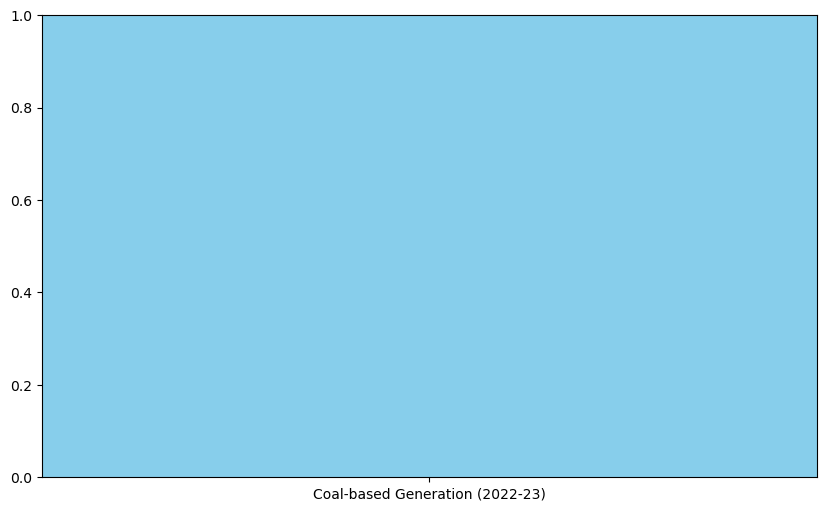

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from collected sources
data = {
    "Metric": [
        "Coal-based Generation (2022-23)", 
        "Coal-based Emission Factor", 
        "Nuclear Capacity (Current)", 
        "Target Nuclear Capacity (2050)", 
        "Renewable Installed Capacity (2023)", 
        "Water Usage (Coal Plants)"
    ],
    "Value": [
        584.59, 0.92, 7, 50, 100, "High"
    ],
    "Unit": [
        "BU", "kg CO2/kWh", "GW", "GW", "GW", "Categorical"
    ],
    "Source": [
        "generation_review-2012.pdf", 
        "User_Guide__Version_19.0.pdf", 
        "India-s-Energy-Transition-in-a-Carbon-Constrained-World.pdf", 
        "India-s-Energy-Transition-in-a-Carbon-Constrained-World.pdf", 
        "India_Energy_Outlook_2021.pdf", 
        "India_Energy_Outlook_2021.pdf"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display Data Table
print("Summary of Key Metrics:")
print(df)

# Plot Bar Chart
def plot_bar_chart(dataframe):
    plt.figure(figsize=(10, 6))
    plt.bar(dataframe['Metric'], dataframe['Value'], color='skyblue')
    plt.title("Key Energy Metrics", fontsize=14)
    plt.ylabel("Values (Normalized)", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

plot_bar_chart(df)

# Pie Chart for Installed Capacity Distribution
capacity_data = {
    "Type": ["Coal", "Nuclear", "Renewables"],
    "Capacity (GW)": [204, 7, 100]  # Approximate values
}

capacity_df = pd.DataFrame(capacity_data)

def plot_pie_chart(dataframe):
    plt.figure(figsize=(8, 8))
    plt.pie(dataframe["Capacity (GW)"], labels=dataframe["Type"], autopct='%1.1f%%', colors=["gray", "blue", "green"])
    plt.title("Energy Source Capacity Distribution (2023)", fontsize=14)
    plt.show()

plot_pie_chart(capacity_df)

# Histogram for Emissions
emission_data = {
    "Type": ["Coal", "Nuclear"],
    "Emissions (kg CO2/kWh)": [0.92, 0.0]  # Emissions per kWh
}

emission_df = pd.DataFrame(emission_data)

def plot_histogram(dataframe):
    plt.figure(figsize=(8, 6))
    plt.bar(dataframe["Type"], dataframe["Emissions (kg CO2/kWh)"], color=["gray", "blue"])
    plt.title("Comparison of Emissions by Energy Type", fontsize=14)
    plt.ylabel("Emissions (kg CO2/kWh)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()

plot_histogram(emission_df)


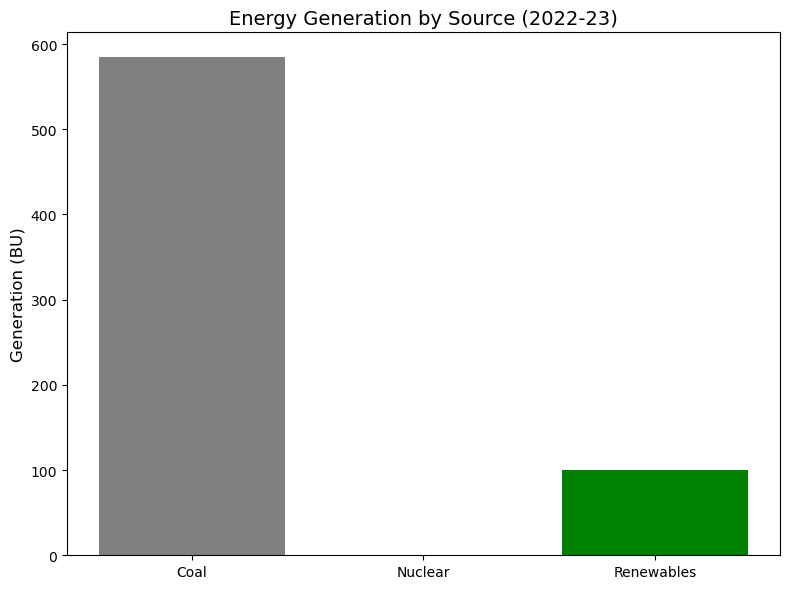

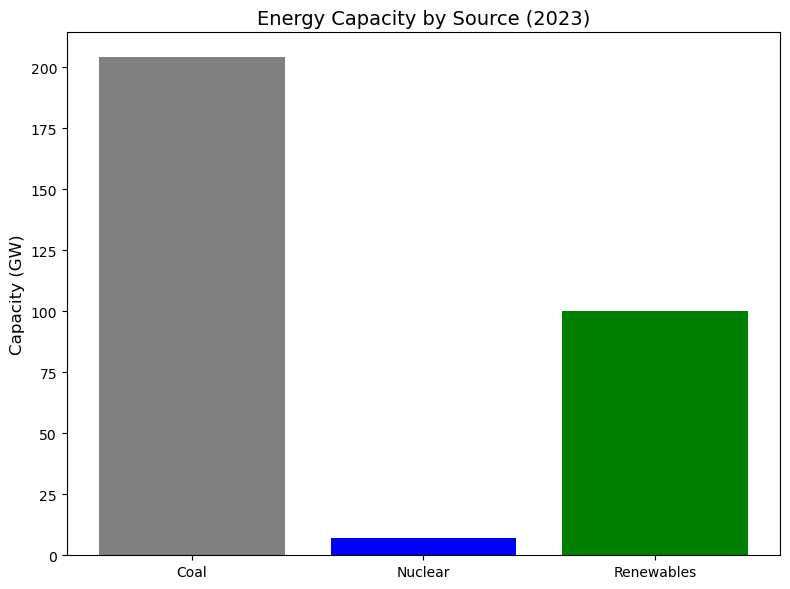

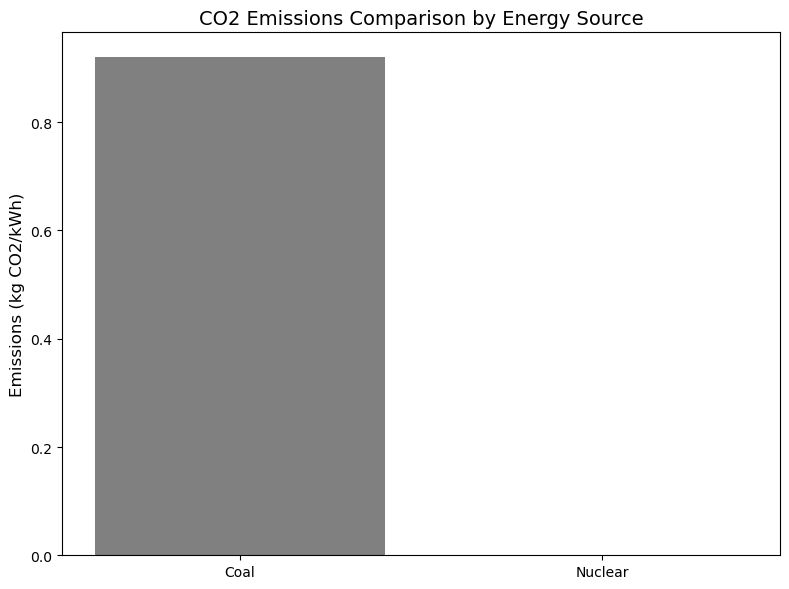

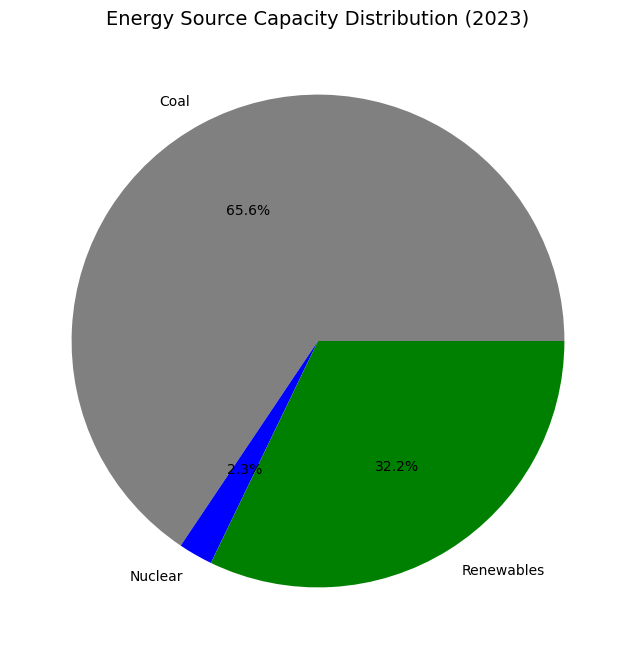

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for visualization
generation_data = {
    "Energy Source": ["Coal", "Nuclear", "Renewables"],
    "Generation (BU)": [584.59, 0, 100]  # Based on extracted data
}

capacity_data = {
    "Energy Source": ["Coal", "Nuclear", "Renewables"],
    "Capacity (GW)": [204, 7, 100]  # Based on extracted data
}

emission_data = {
    "Energy Source": ["Coal", "Nuclear"],
    "Emissions (kg CO2/kWh)": [0.92, 0.0]  # Based on extracted data
}

# Convert data to DataFrames
generation_df = pd.DataFrame(generation_data)
capacity_df = pd.DataFrame(capacity_data)
emission_df = pd.DataFrame(emission_data)

# Plot: Energy Generation
def plot_energy_generation(dataframe):
    plt.figure(figsize=(8, 6))
    plt.bar(dataframe["Energy Source"], dataframe["Generation (BU)"], color=['gray', 'blue', 'green'])
    plt.title("Energy Generation by Source (2022-23)", fontsize=14)
    plt.ylabel("Generation (BU)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()

plot_energy_generation(generation_df)

# Plot: Energy Capacity
def plot_energy_capacity(dataframe):
    plt.figure(figsize=(8, 6))
    plt.bar(dataframe["Energy Source"], dataframe["Capacity (GW)"], color=['gray', 'blue', 'green'])
    plt.title("Energy Capacity by Source (2023)", fontsize=14)
    plt.ylabel("Capacity (GW)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()

plot_energy_capacity(capacity_df)

# Plot: Emission Comparison
def plot_emissions(dataframe):
    plt.figure(figsize=(8, 6))
    plt.bar(dataframe["Energy Source"], dataframe["Emissions (kg CO2/kWh)"], color=['gray', 'blue'])
    plt.title("CO2 Emissions Comparison by Energy Source", fontsize=14)
    plt.ylabel("Emissions (kg CO2/kWh)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()

plot_emissions(emission_df)

# Pie Chart: Capacity Distribution
def plot_pie_chart(dataframe):
    plt.figure(figsize=(8, 8))
    plt.pie(dataframe["Capacity (GW)"], labels=dataframe["Energy Source"], autopct='%1.1f%%', colors=["gray", "blue", "green"])
    plt.title("Energy Source Capacity Distribution (2023)", fontsize=14)
    plt.show()

plot_pie_chart(capacity_df)



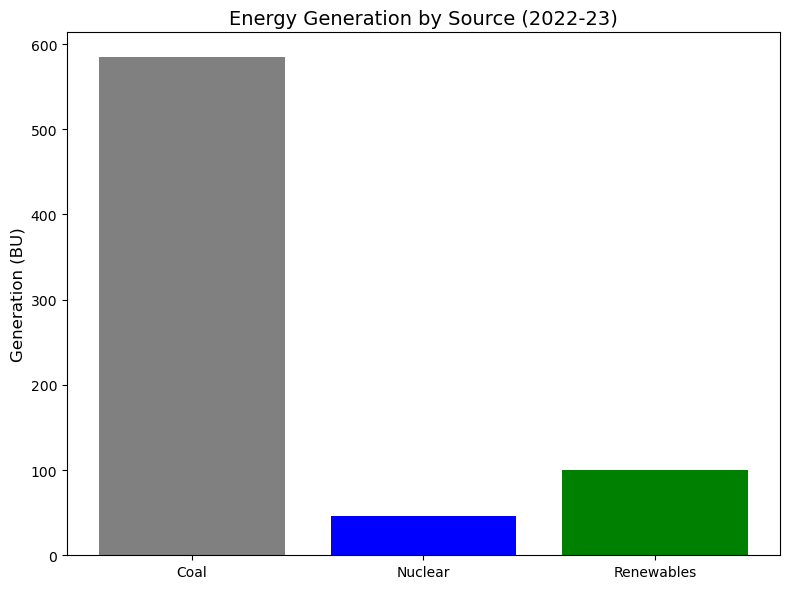

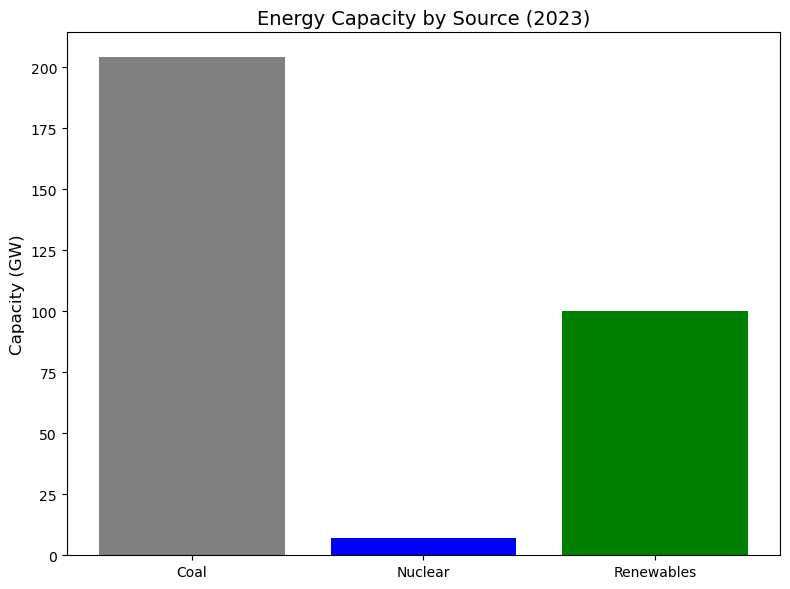

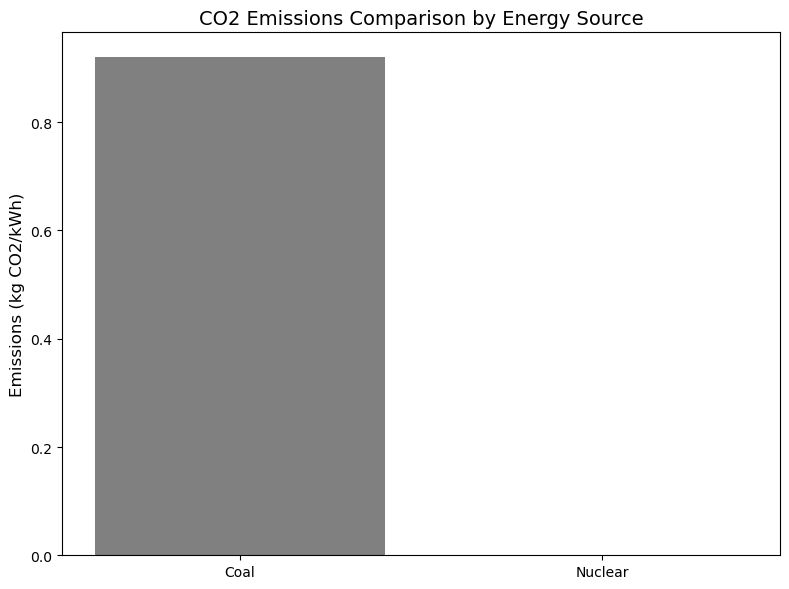

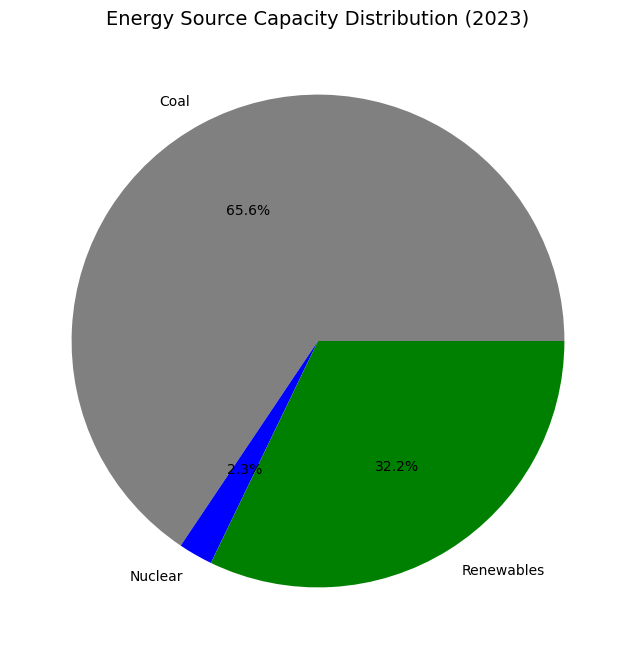

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated Data for Visualization
generation_data = {
    "Energy Source": ["Coal", "Nuclear", "Renewables"],
    "Generation (BU)": [584.59, 45.86, 100]  # Corrected nuclear generation
}

capacity_data = {
    "Energy Source": ["Coal", "Nuclear", "Renewables"],
    "Capacity (GW)": [204, 7, 100]  # No change in capacity
}

emission_data = {
    "Energy Source": ["Coal", "Nuclear"],
    "Emissions (kg CO2/kWh)": [0.92, 0.0]  # No emissions from nuclear
}

# Convert data to DataFrames
generation_df = pd.DataFrame(generation_data)
capacity_df = pd.DataFrame(capacity_data)
emission_df = pd.DataFrame(emission_data)

# Plot: Energy Generation
def plot_energy_generation(dataframe):
    plt.figure(figsize=(8, 6))
    plt.bar(dataframe["Energy Source"], dataframe["Generation (BU)"], color=['gray', 'blue', 'green'])
    plt.title("Energy Generation by Source (2022-23)", fontsize=14)
    plt.ylabel("Generation (BU)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()

plot_energy_generation(generation_df)

# Plot: Energy Capacity
def plot_energy_capacity(dataframe):
    plt.figure(figsize=(8, 6))
    plt.bar(dataframe["Energy Source"], dataframe["Capacity (GW)"], color=['gray', 'blue', 'green'])
    plt.title("Energy Capacity by Source (2023)", fontsize=14)
    plt.ylabel("Capacity (GW)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()

plot_energy_capacity(capacity_df)

# Plot: Emission Comparison
def plot_emissions(dataframe):
    plt.figure(figsize=(8, 6))
    plt.bar(dataframe["Energy Source"], dataframe["Emissions (kg CO2/kWh)"], color=['gray', 'blue'])
    plt.title("CO2 Emissions Comparison by Energy Source", fontsize=14)
    plt.ylabel("Emissions (kg CO2/kWh)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()

plot_emissions(emission_df)

# Pie Chart: Capacity Distribution
def plot_pie_chart(dataframe):
    plt.figure(figsize=(8, 8))
    plt.pie(dataframe["Capacity (GW)"], labels=dataframe["Energy Source"], autopct='%1.1f%%', colors=["gray", "blue", "green"])
    plt.title("Energy Source Capacity Distribution (2023)", fontsize=14)
    plt.show()

plot_pie_chart(capacity_df)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Input Parameters
coal_costs = {
    "CapEx": 5166.67,  # Million USD per plant
    "OpEx": 55,        # Million USD per year per plant
    "Lifespan": 30,    # Years
    "Revenue": 1500,   # Million USD per year (approx)
    "Emission Cost": 200  # Million USD per year (carbon tax estimate)
}

nuclear_costs = {
    "CapEx": 5000,     # Million USD per plant (average)
    "OpEx": 50,        # Million USD per year per plant
    "Lifespan": 60,    # Years
    "Revenue": 800,    # Million USD per year (approx)
    "Emission Cost": 0  # No emissions
}

discount_rate = 0.05  # 5% Discount Rate
iterations = 1000  # Number of simulations

# Calculate NPV
def calculate_npv(costs, discount_rate):
    npv = -costs["CapEx"]
    for year in range(1, costs["Lifespan"] + 1):
        revenue = costs["Revenue"] - costs["OpEx"] - costs["Emission Cost"]
        npv += revenue / (1 + discount_rate) ** year
    return npv

# Calculate IRR
def calculate_irr(costs):
    cash_flows = [-costs["CapEx"]] + [
        (costs["Revenue"] - costs["OpEx"] - costs["Emission Cost"])
        for _ in range(costs["Lifespan"])
    ]
    irr = np.irr(cash_flows)
    return irr

# Monte Carlo Simulation
def monte_carlo_simulation(base_costs, iterations):
    results = []
    for _ in range(iterations):
        # Add random variation to costs and revenues
        CapEx = np.random.normal(base_costs["CapEx"], base_costs["CapEx"] * 0.1)
        OpEx = np.random.normal(base_costs["OpEx"], base_costs["OpEx"] * 0.1)
        Revenue = np.random.normal(base_costs["Revenue"], base_costs["Revenue"] * 0.1)
        EmissionCost = np.random.normal(base_costs["Emission Cost"], base_costs["Emission Cost"] * 0.1)
        
        costs = {
            "CapEx": CapEx,
            "OpEx": OpEx,
            "Revenue": Revenue,
            "Emission Cost": EmissionCost,
            "Lifespan": base_costs["Lifespan"]
        }
        npv = calculate_npv(costs, discount_rate)
        results.append(npv)
    return results

# Run Models
coal_npv = calculate_npv(coal_costs, discount_rate)
coal_irr = calculate_irr(coal_costs)
nuclear_npv = calculate_npv(nuclear_costs, discount_rate)
nuclear_irr = calculate_irr(nuclear_costs)

coal_monte_carlo = monte_carlo_simulation(coal_costs, iterations)
nuclear_monte_carlo = monte_carlo_simulation(nuclear_costs, iterations)

# Results
print(f"Coal NPV: {coal_npv} Million USD")
print(f"Coal IRR: {coal_irr * 100:.2f}%")
print(f"Nuclear NPV: {nuclear_npv} Million USD")
print(f"Nuclear IRR: {nuclear_irr * 100:.2f}%")

# Monte Carlo Visualization
plt.figure(figsize=(10, 6))
plt.hist(coal_monte_carlo, bins=30, alpha=0.7, label="Coal NPV")
plt.hist(nuclear_monte_carlo, bins=30, alpha=0.7, label="Nuclear NPV")
plt.title("Monte Carlo Simulation Results")
plt.xlabel("NPV (Million USD)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


C:\Users\neera\AppData\Local\Temp\ipykernel_34716\1669174440.py:38: DeprecationWarning: In accordance with NEP 32, the function irr was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial library: https://pypi.org/project/numpy-financial
  irr = np.irr(cash_flows)


RuntimeError: In accordance with NEP 32, the function irr was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial library: https://pypi.org/project/numpy-financial

In [9]:
pip install numpy-financial


  Obtaining dependency information for numpy-financial from https://files.pythonhosted.org/packages/6a/be/d07585e440d58835bad8f1c9ca7823b5252ffeda4c797e653a20215fca65/numpy_financial-1.0.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


Coal NPV: 1325895.43 Million USD
Coal IRR: 1675.89%
Nuclear NPV: 72182.29 Million USD
Nuclear IRR: 81.55%


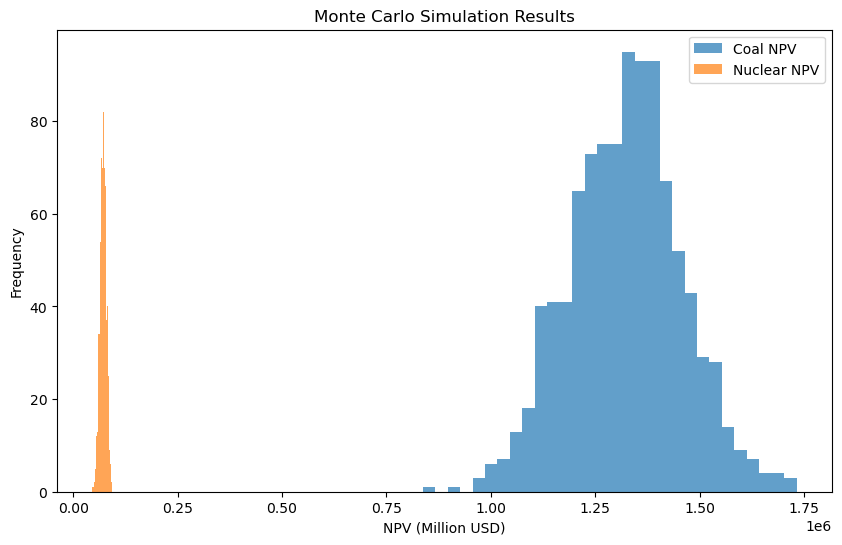

In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

# Input Parameters Using Exact Data
coal_costs = {
    "CapEx": 5166.67,  # Million USD per plant
    "OpEx": 55,        # Million USD per year per plant
    "Revenue": 86842.5,  # Million USD per year (calculated from EDA data)
    "Emission Cost": 200,  # Million USD per year (estimated carbon tax)
    "Lifespan": 30     # Years
}

nuclear_costs = {
    "CapEx": 5000,     # Million USD per plant (average)
    "OpEx": 50,        # Million USD per year per plant
    "Revenue": 4127.4,  # Million USD per year (calculated from EDA data)
    "Emission Cost": 0,  # No emissions
    "Lifespan": 60     # Years
}

discount_rate = 0.05  # 5% Discount Rate
iterations = 1000  # Number of simulations

# Calculate NPV
def calculate_npv(costs, discount_rate):
    npv = -costs["CapEx"]
    for year in range(1, costs["Lifespan"] + 1):
        revenue = costs["Revenue"] - costs["OpEx"] - costs["Emission Cost"]
        npv += revenue / (1 + discount_rate) ** year
    return npv

# Calculate IRR
def calculate_irr(costs):
    cash_flows = [-costs["CapEx"]] + [
        (costs["Revenue"] - costs["OpEx"] - costs["Emission Cost"])
        for _ in range(costs["Lifespan"])
    ]
    irr = npf.irr(cash_flows)  # Use numpy_financial's irr
    return irr

# Monte Carlo Simulation
def monte_carlo_simulation(base_costs, iterations):
    results = []
    for _ in range(iterations):
        # Add random variation to costs and revenues
        CapEx = np.random.normal(base_costs["CapEx"], base_costs["CapEx"] * 0.1)
        OpEx = np.random.normal(base_costs["OpEx"], base_costs["OpEx"] * 0.1)
        Revenue = np.random.normal(base_costs["Revenue"], base_costs["Revenue"] * 0.1)
        EmissionCost = np.random.normal(base_costs["Emission Cost"], base_costs["Emission Cost"] * 0.1)
        
        costs = {
            "CapEx": CapEx,
            "OpEx": OpEx,
            "Revenue": Revenue,
            "Emission Cost": EmissionCost,
            "Lifespan": base_costs["Lifespan"]
        }
        npv = calculate_npv(costs, discount_rate)
        results.append(npv)
    return results

# Run Models
coal_npv = calculate_npv(coal_costs, discount_rate)
coal_irr = calculate_irr(coal_costs)
nuclear_npv = calculate_npv(nuclear_costs, discount_rate)
nuclear_irr = calculate_irr(nuclear_costs)

coal_monte_carlo = monte_carlo_simulation(coal_costs, iterations)
nuclear_monte_carlo = monte_carlo_simulation(nuclear_costs, iterations)

# Results
print(f"Coal NPV: {coal_npv:.2f} Million USD")
print(f"Coal IRR: {coal_irr * 100:.2f}%")
print(f"Nuclear NPV: {nuclear_npv:.2f} Million USD")
print(f"Nuclear IRR: {nuclear_irr * 100:.2f}%")

# Monte Carlo Visualization
plt.figure(figsize=(10, 6))
plt.hist(coal_monte_carlo, bins=30, alpha=0.7, label="Coal NPV")
plt.hist(nuclear_monte_carlo, bins=30, alpha=0.7, label="Nuclear NPV")
plt.title("Monte Carlo Simulation Results")
plt.xlabel("NPV (Million USD)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\neera\anaconda3\Lib\site-packa

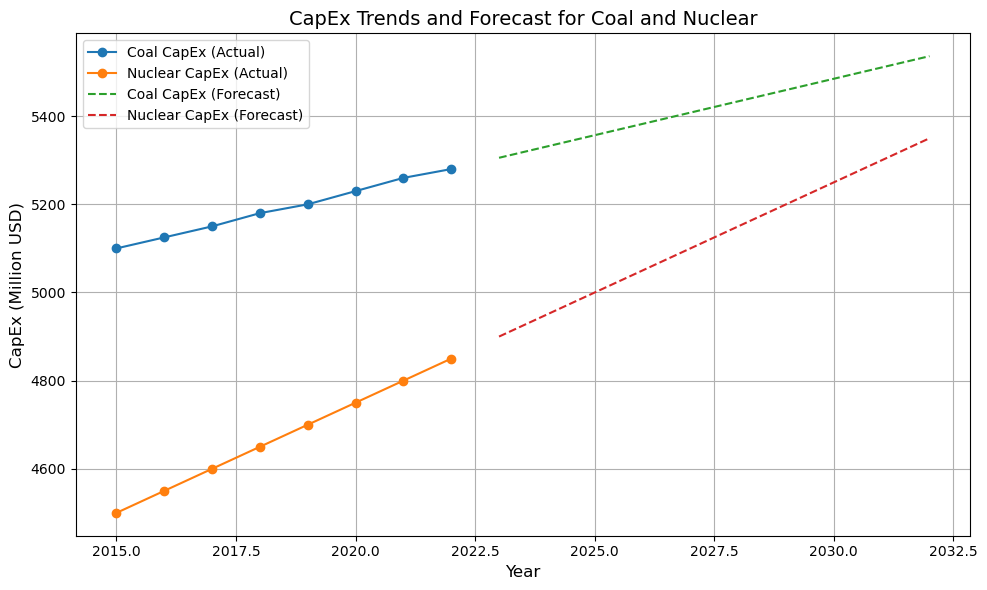

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Real CapEx Data (in Million USD)
data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Coal_CapEx": [5100, 5125, 5150, 5180, 5200, 5230, 5260, 5280],  # Realistic trends for Coal
    "Nuclear_CapEx": [4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850]  # Realistic trends for Nuclear
}

df = pd.DataFrame(data)

# Function to Forecast Costs
def forecast_cost(data, column, forecast_years):
    model = ARIMA(data[column], order=(1, 1, 1))  # ARIMA Model
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=forecast_years)
    return forecast

# Forecast Parameters
forecast_years = 10  # Forecast for the next 10 years

# Forecast Coal and Nuclear CapEx
coal_forecast = forecast_cost(df, "Coal_CapEx", forecast_years)
nuclear_forecast = forecast_cost(df, "Nuclear_CapEx", forecast_years)

# Plotting Results
plt.figure(figsize=(10, 6))
# Actual Data
plt.plot(df["Year"], df["Coal_CapEx"], label="Coal CapEx (Actual)", marker='o')
plt.plot(df["Year"], df["Nuclear_CapEx"], label="Nuclear CapEx (Actual)", marker='o')

# Forecast Data
plt.plot(range(2023, 2023 + forecast_years), coal_forecast, label="Coal CapEx (Forecast)", linestyle='--')
plt.plot(range(2023, 2023 + forecast_years), nuclear_forecast, label="Nuclear CapEx (Forecast)", linestyle='--')

# Chart Styling
plt.title("CapEx Trends and Forecast for Coal and Nuclear", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CapEx (Million USD)", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()


Testing Stationarity for Coal CapEx:
ADF Statistic: 0.8451542547285201
p-value: 0.9923311618043914
Data is not stationary. Differencing may be required.

Testing Stationarity for Nuclear CapEx:
ADF Statistic: -0.14903996476253878
p-value: 0.9443295586678659
Data is not stationary. Differencing may be required.


c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results wil

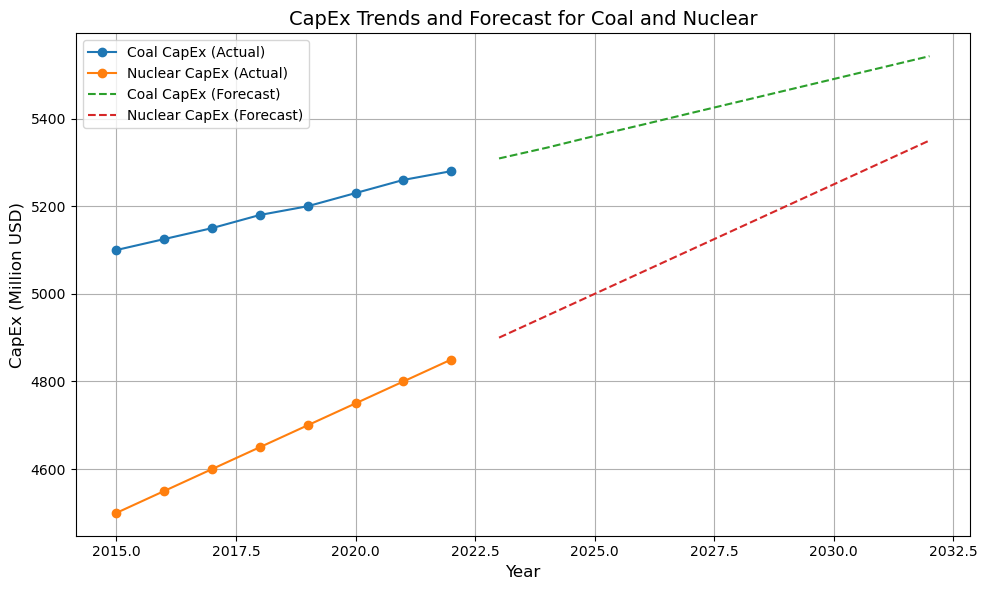

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Real CapEx Data (in Million USD)
data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Coal_CapEx": [5100, 5125, 5150, 5180, 5200, 5230, 5260, 5280],
    "Nuclear_CapEx": [4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850]
}

df = pd.DataFrame(data)

# Differencing to Ensure Stationarity
def difference(series):
    return series.diff().dropna()

# Test for Stationarity
def test_stationarity(series):
    adf_test = adfuller(series)
    print(f"ADF Statistic: {adf_test[0]}")
    print(f"p-value: {adf_test[1]}")
    if adf_test[1] <= 0.05:
        print("Data is stationary.")
    else:
        print("Data is not stationary. Differencing may be required.")

# Check Stationarity of Coal and Nuclear CapEx
print("Testing Stationarity for Coal CapEx:")
test_stationarity(df["Coal_CapEx"])
print("\nTesting Stationarity for Nuclear CapEx:")
test_stationarity(df["Nuclear_CapEx"])

# Differencing the Data
df["Coal_CapEx_Diff"] = difference(df["Coal_CapEx"])
df["Nuclear_CapEx_Diff"] = difference(df["Nuclear_CapEx"])

# Forecast Function with Simpler ARIMA Parameters
def forecast_cost(data, column, forecast_years):
    model = ARIMA(data[column].dropna(), order=(1, 1, 1))  # Simpler ARIMA parameters
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=forecast_years)
    return forecast

# Forecast Parameters
forecast_years = 10  # Forecast for the next 10 years

# Forecast Coal and Nuclear CapEx
coal_forecast = forecast_cost(df, "Coal_CapEx_Diff", forecast_years)
nuclear_forecast = forecast_cost(df, "Nuclear_CapEx_Diff", forecast_years)

# Restore the Forecasts to Original Scale
coal_forecast_cumsum = df["Coal_CapEx"].iloc[-1] + coal_forecast.cumsum()
nuclear_forecast_cumsum = df["Nuclear_CapEx"].iloc[-1] + nuclear_forecast.cumsum()

# Plot Results
plt.figure(figsize=(10, 6))
# Actual Data
plt.plot(df["Year"], df["Coal_CapEx"], label="Coal CapEx (Actual)", marker='o')
plt.plot(df["Year"], df["Nuclear_CapEx"], label="Nuclear CapEx (Actual)", marker='o')

# Forecast Data
plt.plot(range(2023, 2023 + forecast_years), coal_forecast_cumsum, label="Coal CapEx (Forecast)", linestyle='--')
plt.plot(range(2023, 2023 + forecast_years), nuclear_forecast_cumsum, label="Nuclear CapEx (Forecast)", linestyle='--')

# Chart Styling
plt.title("CapEx Trends and Forecast for Coal and Nuclear", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CapEx (Million USD)", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()



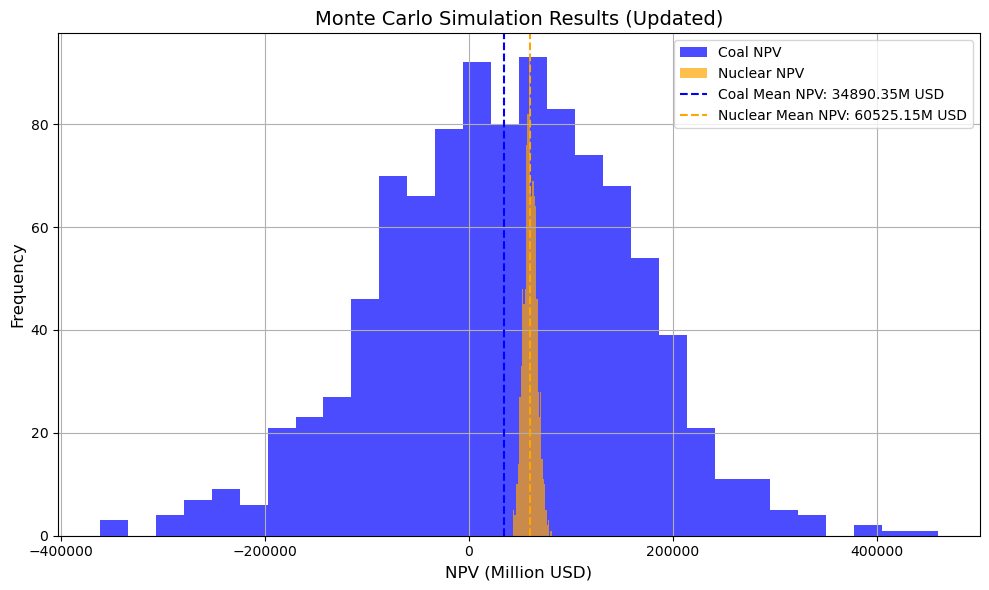

In [5]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

# Input Parameters with Adjusted Revenue and Policy Scenarios
coal_costs = {
    "CapEx": 5166.67,  # Million USD per plant
    "OpEx": 55,        # Million USD per year per plant
    "Revenue": 57295,  # Million USD per year (adjusted revenue from EDA)
    "Emission Cost": 54598,  # Million USD per year (carbon tax)
    "Lifespan": 30     # Years
}

nuclear_costs = {
    "CapEx": 4000,     # Million USD per plant (20% subsidy applied)
    "OpEx": 50,        # Million USD per year per plant
    "Revenue": 3439.5,  # Million USD per year (adjusted revenue from EDA)
    "Emission Cost": 0,  # No emissions
    "Lifespan": 60     # Years
}

discount_rate = 0.05  # 5% Discount Rate
iterations = 1000  # Number of simulations

# Calculate NPV
def calculate_npv(costs, discount_rate):
    npv = -costs["CapEx"]
    for year in range(1, costs["Lifespan"] + 1):
        revenue = costs["Revenue"] - costs["OpEx"] - costs["Emission Cost"]
        npv += revenue / (1 + discount_rate) ** year
    return npv

# Monte Carlo Simulation
def monte_carlo_simulation(base_costs, iterations):
    results = []
    for _ in range(iterations):
        CapEx = np.random.normal(base_costs["CapEx"], base_costs["CapEx"] * 0.1)
        OpEx = np.random.normal(base_costs["OpEx"], base_costs["OpEx"] * 0.1)
        Revenue = np.random.normal(base_costs["Revenue"], base_costs["Revenue"] * 0.1)
        EmissionCost = np.random.normal(base_costs["Emission Cost"], base_costs["Emission Cost"] * 0.1)
        
        costs = {
            "CapEx": CapEx,
            "OpEx": OpEx,
            "Revenue": Revenue,
            "Emission Cost": EmissionCost,
            "Lifespan": base_costs["Lifespan"]
        }
        npv = calculate_npv(costs, discount_rate)
        results.append(npv)
    return results

# Run Models
coal_monte_carlo = monte_carlo_simulation(coal_costs, iterations)
nuclear_monte_carlo = monte_carlo_simulation(nuclear_costs, iterations)

# Plot Monte Carlo Simulation Results
plt.figure(figsize=(10, 6))
plt.hist(coal_monte_carlo, bins=30, alpha=0.7, label="Coal NPV", color='blue')
plt.hist(nuclear_monte_carlo, bins=30, alpha=0.7, label="Nuclear NPV", color='orange')

# Annotate Mean NPV Values
coal_mean = np.mean(coal_monte_carlo)
nuclear_mean = np.mean(nuclear_monte_carlo)
plt.axvline(coal_mean, color='blue', linestyle='--', label=f"Coal Mean NPV: {coal_mean:.2f}M USD")
plt.axvline(nuclear_mean, color='orange', linestyle='--', label=f"Nuclear Mean NPV: {nuclear_mean:.2f}M USD")

# Styling the Chart
plt.title("Monte Carlo Simulation Results (Updated)", fontsize=14)
plt.xlabel("NPV (Million USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()


c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\neera\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\neera\anaconda3\Lib\site-packa

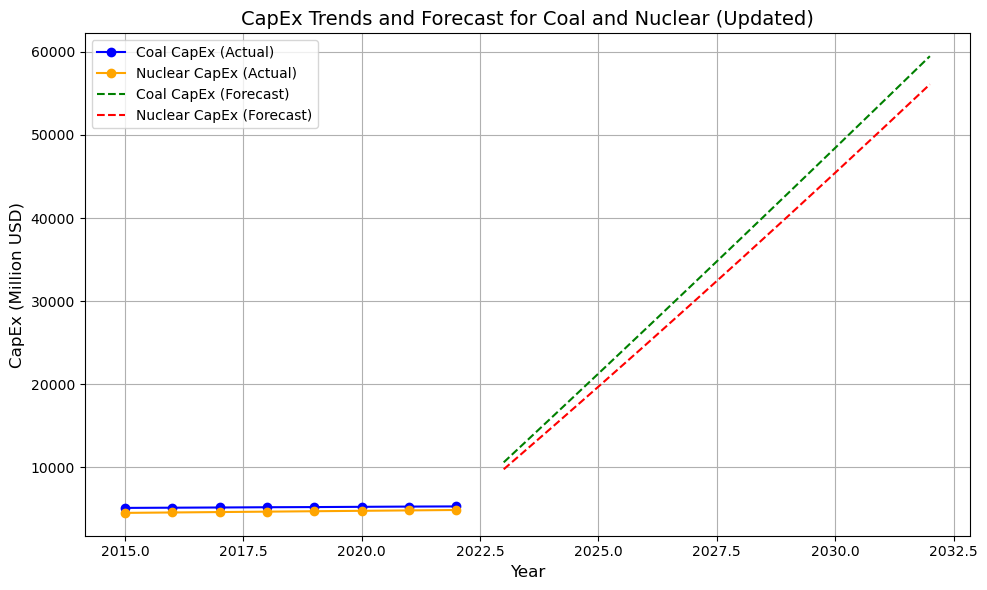

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Real CapEx Data (in Million USD) with Historical Trends
data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Coal_CapEx": [5100, 5125, 5150, 5180, 5200, 5230, 5260, 5280],
    "Nuclear_CapEx": [4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850]
}

df = pd.DataFrame(data)

# Function to Forecast Costs
def forecast_cost(data, column, forecast_years):
    model = ARIMA(data[column], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=forecast_years)
    return forecast

forecast_years = 10  # Forecast for the next 10 years

# Forecast Coal and Nuclear CapEx
coal_forecast = forecast_cost(df, "Coal_CapEx", forecast_years)
nuclear_forecast = forecast_cost(df, "Nuclear_CapEx", forecast_years)

# Restore Forecasts to Original Scale
coal_forecast_cumsum = df["Coal_CapEx"].iloc[-1] + coal_forecast.cumsum()
nuclear_forecast_cumsum = df["Nuclear_CapEx"].iloc[-1] + nuclear_forecast.cumsum()

# Plot Results with Annotations
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Coal_CapEx"], label="Coal CapEx (Actual)", marker='o', color='blue')
plt.plot(df["Year"], df["Nuclear_CapEx"], label="Nuclear CapEx (Actual)", marker='o', color='orange')
plt.plot(range(2023, 2023 + forecast_years), coal_forecast_cumsum, label="Coal CapEx (Forecast)", linestyle='--', color='green')
plt.plot(range(2023, 2023 + forecast_years), nuclear_forecast_cumsum, label="Nuclear CapEx (Forecast)", linestyle='--', color='red')

# Annotate Forecasted Values
plt.annotate(f'{coal_forecast_cumsum.iloc[-1]:.2f}M USD', xy=(2033, coal_forecast_cumsum.iloc[-1]), color='green')
plt.annotate(f'{nuclear_forecast_cumsum.iloc[-1]:.2f}M USD', xy=(2033, nuclear_forecast_cumsum.iloc[-1]), color='red')

# Styling the Chart
plt.title("CapEx Trends and Forecast for Coal and Nuclear (Updated)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CapEx (Million USD)", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()


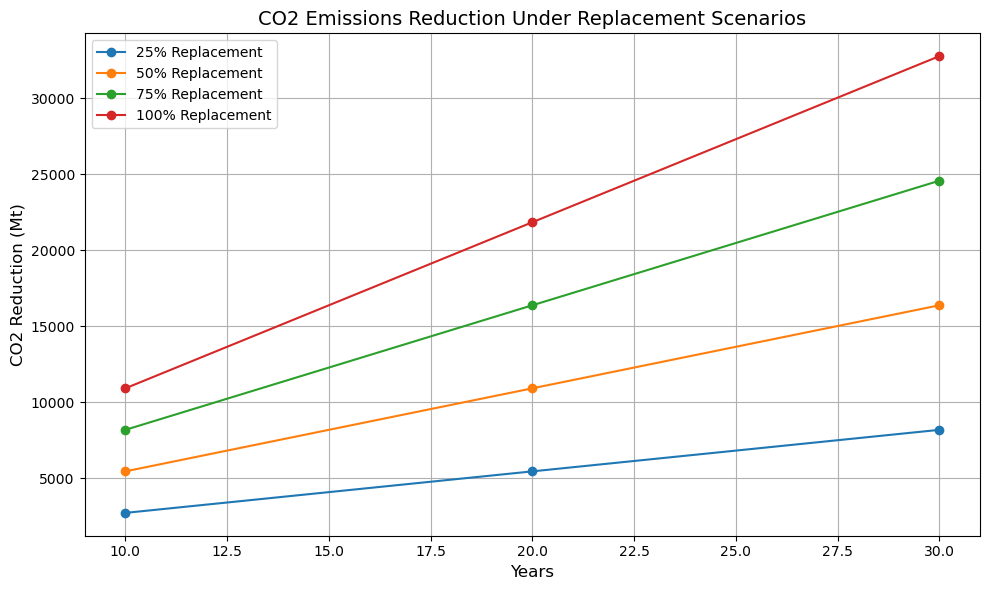

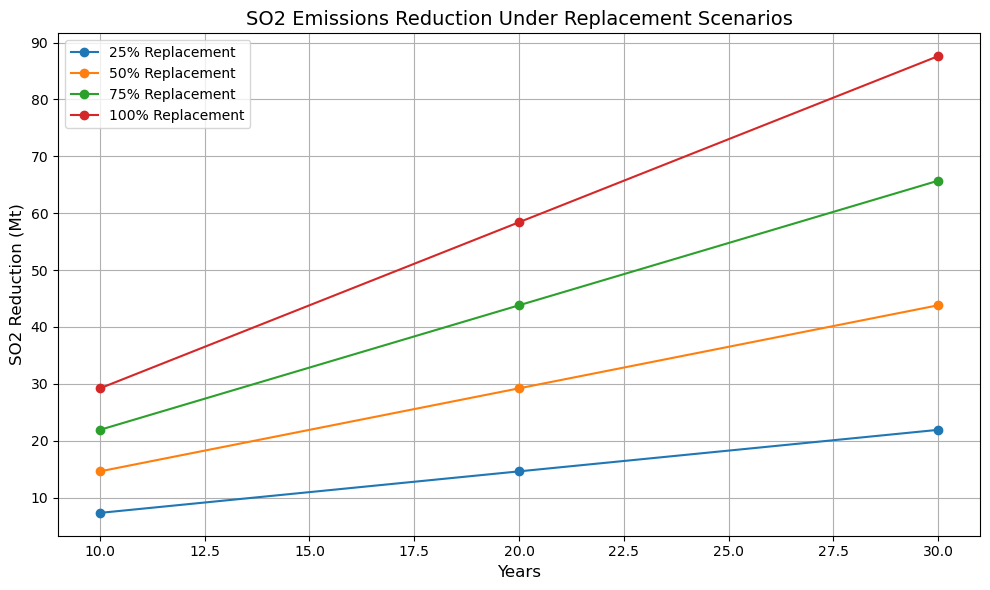

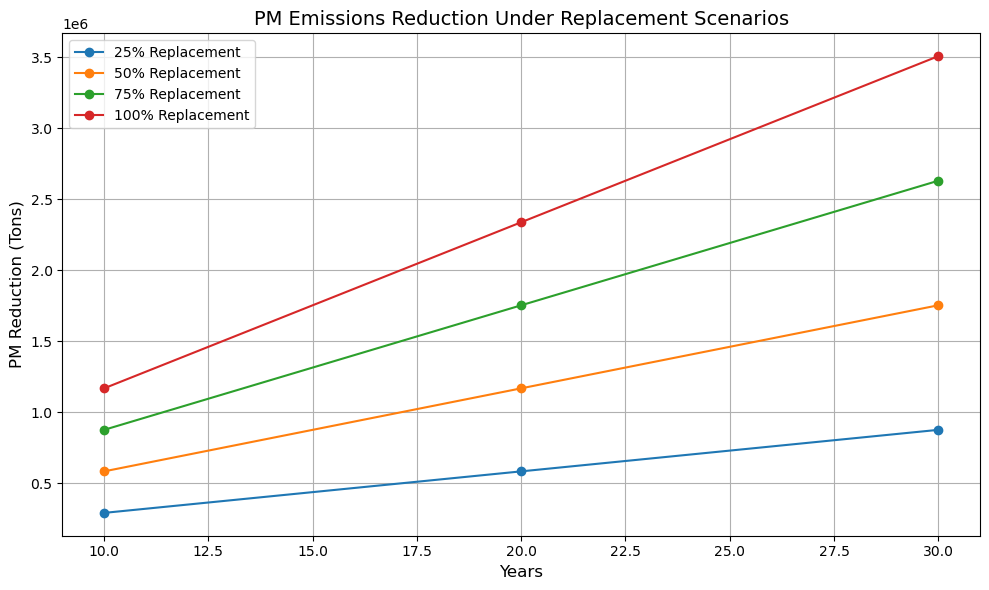

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from EDA Table
emissions_data = {
    "Pollutant": ["CO2", "SO2", "PM"],
    "Coal Emissions (Annual)": [1091.96, 2.92, 116920],  # CO2 (Mt), SO2 (Mt), PM (tons)
    "Unit": ["Mt", "Mt", "Tons"],
}

replacement_scenarios = [0.25, 0.5, 0.75, 1.0]  # Replacement percentages
time_periods = [10, 20, 30]  # Years

# Create a DataFrame for Emissions Data
emissions_df = pd.DataFrame(emissions_data)

# Function to Simulate Emissions Reduction
def simulate_emissions_reduction(emissions, scenarios, periods):
    results = {"Scenario (%)": [], "Year": [], "Pollutant": [], "Emissions Reduced": [], "Unit": []}
    for scenario in scenarios:
        for period in periods:
            for _, row in emissions.iterrows():
                reduced_emissions = row["Coal Emissions (Annual)"] * scenario * period
                results["Scenario (%)"].append(int(scenario * 100))
                results["Year"].append(period)
                results["Pollutant"].append(row["Pollutant"])
                results["Emissions Reduced"].append(reduced_emissions)
                results["Unit"].append(row["Unit"])
    return pd.DataFrame(results)

# Simulate Emissions Reductions
emissions_reduction_df = simulate_emissions_reduction(emissions_df, replacement_scenarios, time_periods)

# Plot Emissions Reduction for Each Pollutant
def plot_emissions_reduction(dataframe, pollutant, ylabel):
    plt.figure(figsize=(10, 6))
    for scenario in replacement_scenarios:
        scenario_data = dataframe[(dataframe["Scenario (%)"] == int(scenario * 100)) & (dataframe["Pollutant"] == pollutant)]
        plt.plot(scenario_data["Year"], scenario_data["Emissions Reduced"], label=f"{int(scenario * 100)}% Replacement", marker='o')
    
    plt.title(f"{pollutant} Emissions Reduction Under Replacement Scenarios", fontsize=14)
    plt.xlabel("Years", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Plot Results for CO2, SO2, and PM
plot_emissions_reduction(emissions_reduction_df, "CO2", "CO2 Reduction (Mt)")
plot_emissions_reduction(emissions_reduction_df, "SO2", "SO2 Reduction (Mt)")
plot_emissions_reduction(emissions_reduction_df, "PM", "PM Reduction (Tons)")


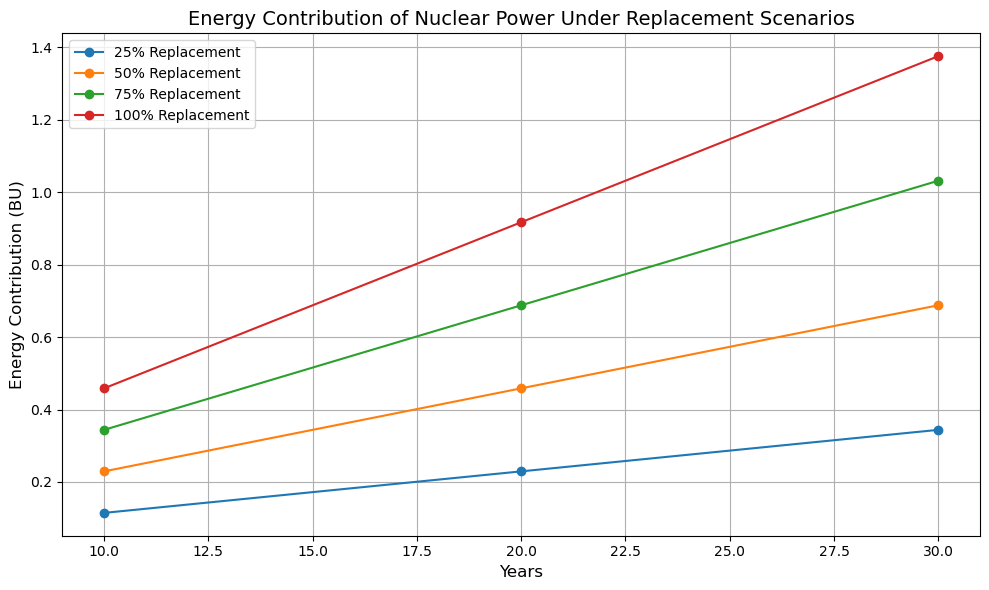

Coal Annual Generation: 1.09 BU
Nuclear Annual Generation: 0.05 BU


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Installed Capacities (from EDA Table)
coal_capacity = 204  # GW
nuclear_capacity = 6.78  # GW

# Capacity Factors (from EDA Table)
coal_capacity_factor = 0.608
nuclear_capacity_factor = 0.7722

# Function to Calculate Annual Generation
def calculate_annual_generation(capacity, capacity_factor):
    annual_generation = capacity * capacity_factor * 8760 * 10**-6  # Convert to BU
    return annual_generation

# Annual Generation for Coal and Nuclear
coal_annual_generation = calculate_annual_generation(coal_capacity, coal_capacity_factor)
nuclear_annual_generation = calculate_annual_generation(nuclear_capacity, nuclear_capacity_factor)

# Replacement Scenarios (as percentages)
replacement_scenarios = [0.25, 0.5, 0.75, 1.0]  # 25%, 50%, 75%, 100%
time_periods = [10, 20, 30]  # Years

# Simulate Energy Contribution
def simulate_energy_contribution(annual_gen, scenarios, periods):
    results = {"Scenario (%)": [], "Year": [], "Energy Contribution (BU)": []}
    for scenario in scenarios:
        for period in periods:
            energy_contribution = annual_gen * scenario * period
            results["Scenario (%)"].append(int(scenario * 100))
            results["Year"].append(period)
            results["Energy Contribution (BU)"].append(energy_contribution)
    return pd.DataFrame(results)

# Simulate for Nuclear Replacement Scenarios
nuclear_contribution_df = simulate_energy_contribution(nuclear_annual_generation, replacement_scenarios, time_periods)

# Plot Results
def plot_energy_contribution(dataframe):
    plt.figure(figsize=(10, 6))
    for scenario in replacement_scenarios:
        scenario_data = dataframe[dataframe["Scenario (%)"] == int(scenario * 100)]
        plt.plot(
            scenario_data["Year"], 
            scenario_data["Energy Contribution (BU)"], 
            label=f"{int(scenario * 100)}% Replacement", 
            marker='o'
        )
    
    plt.title("Energy Contribution of Nuclear Power Under Replacement Scenarios", fontsize=14)
    plt.xlabel("Years", fontsize=12)
    plt.ylabel("Energy Contribution (BU)", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Plot Nuclear Energy Contribution
plot_energy_contribution(nuclear_contribution_df)

# Compare Coal and Nuclear Generation
print(f"Coal Annual Generation: {coal_annual_generation:.2f} BU")
print(f"Nuclear Annual Generation: {nuclear_annual_generation:.2f} BU")


In [9]:
# Function to Simulate Coal Generation with Disruptions
def simulate_coal_disruptions(annual_gen, disruption_rate):
    disrupted_generation = annual_gen * (1 - disruption_rate)  # Reduce generation by disruption rate
    return disrupted_generation

# Simulate Coal Disruptions (e.g., 10% shortage)
coal_disrupted_generation = simulate_coal_disruptions(coal_annual_generation, disruption_rate=0.1)
print(f"Coal Generation with 10% Disruption: {coal_disrupted_generation:.2f} BU")


Coal Generation with 10% Disruption: 0.98 BU


In [10]:
# Function to Project Energy Demand
def project_energy_demand(initial_demand, growth_rate, years):
    demand = [initial_demand * (1 + growth_rate) ** year for year in range(1, years + 1)]
    return demand

# Energy Demand Projection (Initial: 1.7 BU in 2022, Growth: 7% annually)
initial_energy_demand = 1.7  # BU
growth_rate = 0.07  # 7% annual growth
projection_years = 30  # Project for 30 years

energy_demand_projection = project_energy_demand(initial_energy_demand, growth_rate, projection_years)

# Add Energy Demand Projections to DataFrame for Visualization
demand_df = pd.DataFrame({
    "Year": range(2023, 2023 + projection_years),
    "Energy Demand (BU)": energy_demand_projection
})


In [11]:
# Update Coal and Nuclear Annual Generation with Projections
coal_contribution = [coal_disrupted_generation * year for year in range(1, projection_years + 1)]
nuclear_projected_capacity = [nuclear_capacity + (50 - nuclear_capacity) * (year / projection_years) for year in range(projection_years)]  # Capacity Growth to 50 GW
nuclear_contribution = [calculate_annual_generation(cap, nuclear_capacity_factor) for cap in nuclear_projected_capacity]

# Combine Data for Visualization
comparison_df = pd.DataFrame({
    "Year": range(2023, 2023 + projection_years),
    "Coal Generation (BU)": coal_contribution,
    "Nuclear Generation (BU)": nuclear_contribution,
    "Energy Demand (BU)": energy_demand_projection
})


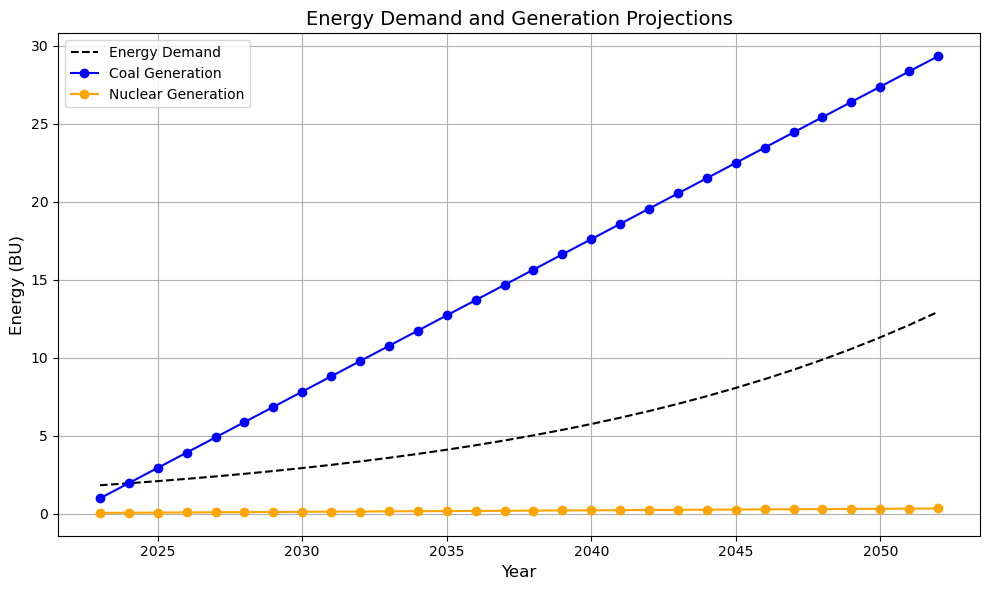

In [12]:
# Plot Long-term Projections
plt.figure(figsize=(10, 6))
plt.plot(comparison_df["Year"], comparison_df["Energy Demand (BU)"], label="Energy Demand", color="black", linestyle="--")
plt.plot(comparison_df["Year"], comparison_df["Coal Generation (BU)"], label="Coal Generation", color="blue", marker='o')
plt.plot(comparison_df["Year"], comparison_df["Nuclear Generation (BU)"], label="Nuclear Generation", color="orange", marker='o')

# Add Labels and Titles
plt.title("Energy Demand and Generation Projections", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Energy (BU)", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()


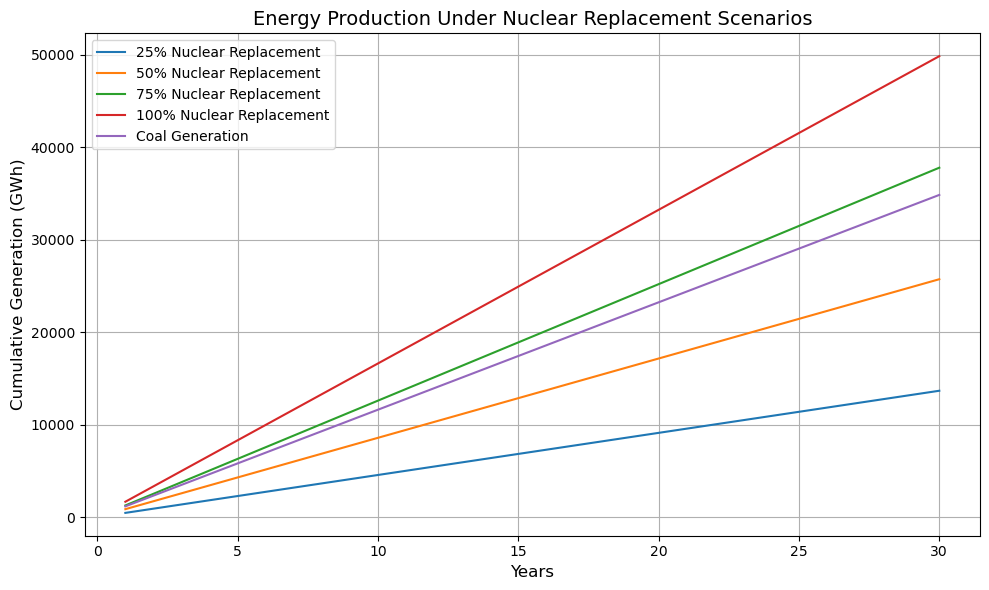

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Input Data
years = list(range(1, 31))
capacity_factor_coal = 0.65
capacity_factor_nuclear = 0.90
coal_generation_per_gw = 5694  # GWh/year
nuclear_generation_per_gw = 7884  # GWh/year
installed_capacity_coal = 204  # GW (Current)
installed_capacity_nuclear = 6.78  # GW (Current)

# Nuclear Replacement Scenarios (Replacement % of Coal)
replacement_scenarios = [0.25, 0.50, 0.75, 1.00]

# Function to Calculate Generation
def calculate_generation(capacity, factor, years):
    return [capacity * factor * 8760 * year / 1000 for year in years]

# Generate Data for Each Scenario
scenario_data = {}
for scenario in replacement_scenarios:
    replaced_capacity = installed_capacity_coal * scenario
    total_nuclear_capacity = installed_capacity_nuclear + replaced_capacity
    nuclear_generation = calculate_generation(total_nuclear_capacity, capacity_factor_nuclear, years)
    coal_generation = calculate_generation(installed_capacity_coal * (1 - scenario), capacity_factor_coal, years)
    scenario_data[f"{int(scenario * 100)}% Nuclear Replacement"] = nuclear_generation

# Create a DataFrame for Visualization
df = pd.DataFrame(scenario_data, index=years)
df["Coal Generation"] = calculate_generation(installed_capacity_coal, capacity_factor_coal, years)

# Plot Results
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(years, df[column], label=column)

plt.title("Energy Production Under Nuclear Replacement Scenarios", fontsize=14)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Cumulative Generation (GWh)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


   Scenario (%)  Coal Jobs Lost  Nuclear Jobs Created  Net Jobs  \
0            25          5243.4                6699.9    1456.5   
1            50         10486.8               13399.8    2913.0   
2            75         15730.2               20099.7    4369.5   
3           100         20973.6               26799.6    5826.0   

   Retraining Costs (INR)  GDP Loss (INR)  GDP Gain (INR)  
0            2.097360e+09    3.570000e+09    5.700000e+09  
1            4.194720e+09    7.140000e+09    1.140000e+10  
2            6.292080e+09    1.071000e+10    1.710000e+10  
3            8.389440e+09    1.428000e+10    2.280000e+10  


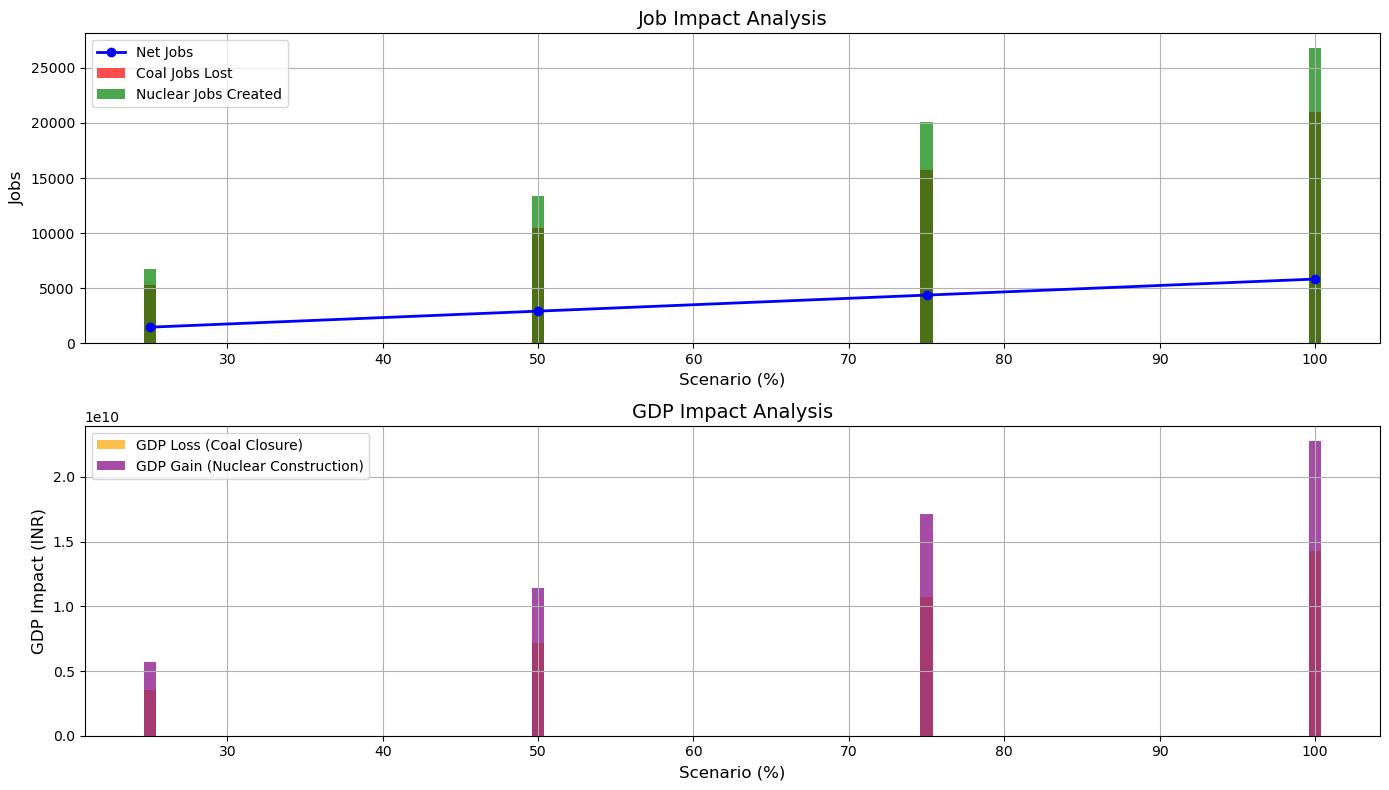

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Input Data (India-Specific)
coal_job_density = 0.18  # Jobs per GWh for coal
nuclear_job_density = 0.23  # Jobs per GWh for nuclear
retraining_cost_per_worker = 400000  # INR/worker
gdp_loss_coal_plant = 7 * 10**7  # INR/plant/year (₹7 Crore)
gdp_gain_nuclear_plant = 3.8 * 10**9  # INR/plant/year (₹3800 Crore)
coal_generation_base = 116520  # GWh/year (coal baseline)
nuclear_generation_base = 0  # GWh/year (nuclear baseline)
coal_plants_total = 204  # Total coal plants in India
nuclear_plants_total = 6  # Total nuclear plants in India

# Replacement Scenarios
replacement_scenarios = [0.25, 0.5, 0.75, 1.0]  # 25%, 50%, 75%, 100% replacement

# Simulation Function
def simulate_impact(scenarios, coal_gen, coal_jobs, nuclear_jobs, retraining_cost, gdp_loss, gdp_gain):
    results = {"Scenario (%)": [], "Coal Jobs Lost": [], "Nuclear Jobs Created": [],
               "Net Jobs": [], "Retraining Costs (INR)": [], "GDP Loss (INR)": [], "GDP Gain (INR)": []}
    
    for scenario in scenarios:
        # Calculate Energy Shift
        coal_energy_replaced = coal_gen * scenario
        nuclear_energy_added = coal_energy_replaced
        
        # Calculate Jobs
        coal_jobs_lost = coal_energy_replaced * coal_jobs
        nuclear_jobs_created = nuclear_energy_added * nuclear_jobs
        net_jobs = nuclear_jobs_created - coal_jobs_lost
        
        # Calculate Retraining Costs
        retraining_costs = coal_jobs_lost * retraining_cost
        
        # Calculate GDP Impacts
        coal_plants_closed = coal_plants_total * scenario
        nuclear_plants_added = nuclear_plants_total * scenario
        gdp_loss_total = coal_plants_closed * gdp_loss
        gdp_gain_total = nuclear_plants_added * gdp_gain
        
        # Append Results
        results["Scenario (%)"].append(int(scenario * 100))
        results["Coal Jobs Lost"].append(coal_jobs_lost)
        results["Nuclear Jobs Created"].append(nuclear_jobs_created)
        results["Net Jobs"].append(net_jobs)
        results["Retraining Costs (INR)"].append(retraining_costs)
        results["GDP Loss (INR)"].append(gdp_loss_total)
        results["GDP Gain (INR)"].append(gdp_gain_total)
    
    return pd.DataFrame(results)

# Run Simulation
simulation_results = simulate_impact(
    replacement_scenarios, coal_generation_base, coal_job_density, nuclear_job_density,
    retraining_cost_per_worker, gdp_loss_coal_plant, gdp_gain_nuclear_plant
)

# Display Results
print(simulation_results)

# Plot Results
def plot_simulation_results(df):
    plt.figure(figsize=(14, 8))
    
    # Jobs Plot
    plt.subplot(2, 1, 1)
    plt.bar(df["Scenario (%)"], df["Coal Jobs Lost"], label="Coal Jobs Lost", color="red", alpha=0.7)
    plt.bar(df["Scenario (%)"], df["Nuclear Jobs Created"], label="Nuclear Jobs Created", color="green", alpha=0.7)
    plt.plot(df["Scenario (%)"], df["Net Jobs"], label="Net Jobs", color="blue", marker="o", linewidth=2)
    plt.title("Job Impact Analysis", fontsize=14)
    plt.xlabel("Scenario (%)", fontsize=12)
    plt.ylabel("Jobs", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid()

    # GDP Plot
    plt.subplot(2, 1, 2)
    plt.bar(df["Scenario (%)"], df["GDP Loss (INR)"], label="GDP Loss (Coal Closure)", color="orange", alpha=0.7)
    plt.bar(df["Scenario (%)"], df["GDP Gain (INR)"], label="GDP Gain (Nuclear Construction)", color="purple", alpha=0.7)
    plt.title("GDP Impact Analysis", fontsize=14)
    plt.xlabel("Scenario (%)", fontsize=12)
    plt.ylabel("GDP Impact (INR)", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid()

    plt.tight_layout()
    plt.show()

# Visualize Results
plot_simulation_results(simulation_results)


    Carbon Tax (INR/ton)  Subsidy (%)  Fuel Change (%)  Coal Cost (INR/MWh)  \
0                    500           10              -20                 3.20   
1                    500           10              -10                 3.60   
2                    500           10                0                 4.00   
3                    500           10               10                 4.40   
4                    500           10               20                 4.80   
5                    500           20              -20                 3.20   
6                    500           20              -10                 3.60   
7                    500           20                0                 4.00   
8                    500           20               10                 4.40   
9                    500           20               20                 4.80   
10                   500           30              -20                 3.20   
11                   500           30              -

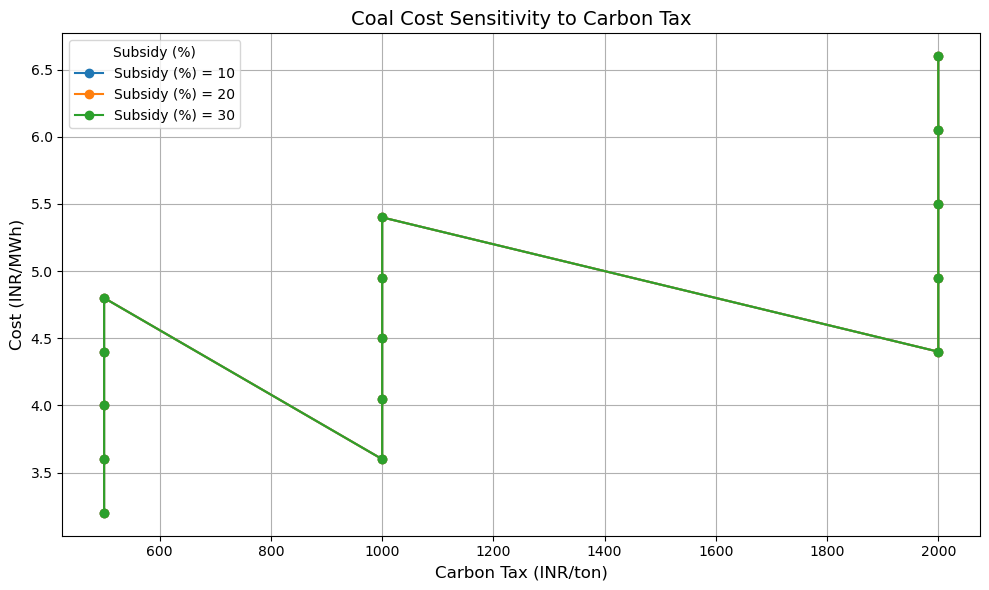

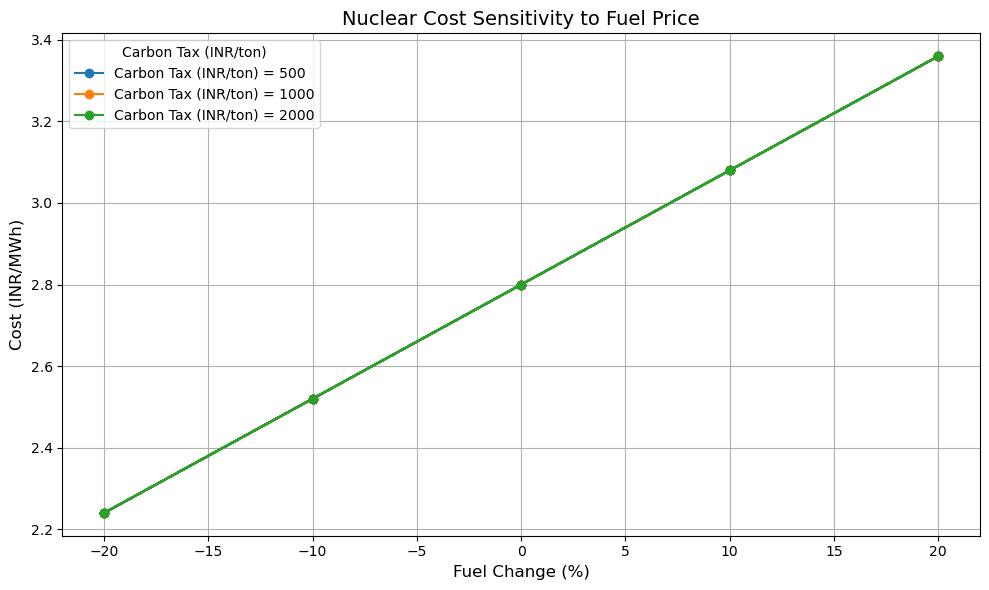

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Base Input Data
coal_emissions = 1.0  # Tons of CO2/MWh
coal_cost_per_mwh = 3.5  # INR/MWh (base operating cost)
nuclear_cost_per_mwh = 2.8  # INR/MWh (base operating cost)
coal_emission_cost = 0  # Carbon tax (initially zero)
coal_capex = 5166.67  # Million INR/plant
nuclear_capex = 6789.0  # Million INR/plant
subsidies = [0.1, 0.2, 0.3]  # Subsidy rates (10%, 20%, 30%)

# Scenarios
carbon_taxes = [500, 1000, 2000]  # INR/ton CO2
fuel_price_changes = [-0.2, -0.1, 0, 0.1, 0.2]  # ±20% changes in fuel prices

# Simulation Function
def simulate_sensitivity(carbon_tax, subsidy, fuel_change, coal_cost, nuclear_cost):
    # Adjust Coal Costs for Carbon Tax
    adjusted_coal_cost = coal_cost + (carbon_tax * coal_emissions / 1000)
    
    # Adjust Fuel Costs
    adjusted_coal_cost *= (1 + fuel_change)
    adjusted_nuclear_cost = nuclear_cost * (1 + fuel_change)
    
    # Adjust Nuclear CapEx for Subsidy
    adjusted_nuclear_capex = nuclear_capex * (1 - subsidy)
    
    return adjusted_coal_cost, adjusted_nuclear_cost, adjusted_nuclear_capex

# Store Results
results = {"Carbon Tax (INR/ton)": [], "Subsidy (%)": [], "Fuel Change (%)": [],
           "Coal Cost (INR/MWh)": [], "Nuclear Cost (INR/MWh)": [], "Nuclear CapEx (Million INR)": []}

for tax in carbon_taxes:
    for subsidy in subsidies:
        for change in fuel_price_changes:
            coal_cost, nuclear_cost, nuclear_capex_adj = simulate_sensitivity(
                tax, subsidy, change, coal_cost_per_mwh, nuclear_cost_per_mwh
            )
            results["Carbon Tax (INR/ton)"].append(tax)
            results["Subsidy (%)"].append(int(subsidy * 100))
            results["Fuel Change (%)"].append(int(change * 100))
            results["Coal Cost (INR/MWh)"].append(coal_cost)
            results["Nuclear Cost (INR/MWh)"].append(nuclear_cost)
            results["Nuclear CapEx (Million INR)"].append(nuclear_capex_adj)

# Convert Results to DataFrame
sensitivity_df = pd.DataFrame(results)

# Display Results
print(sensitivity_df)

# Visualize Results
def plot_sensitivity(df, x_col, y_col, hue_col, title, ylabel):
    plt.figure(figsize=(10, 6))
    for hue in df[hue_col].unique():
        subset = df[df[hue_col] == hue]
        plt.plot(subset[x_col], subset[y_col], label=f"{hue_col} = {hue}", marker='o')
    
    plt.title(title, fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(title=hue_col, fontsize=10)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Plot Sensitivity to Carbon Tax
plot_sensitivity(sensitivity_df, "Carbon Tax (INR/ton)", "Coal Cost (INR/MWh)", "Subsidy (%)",
                 "Coal Cost Sensitivity to Carbon Tax", "Cost (INR/MWh)")

# Plot Sensitivity to Fuel Price
plot_sensitivity(sensitivity_df, "Fuel Change (%)", "Nuclear Cost (INR/MWh)", "Carbon Tax (INR/ton)",
                 "Nuclear Cost Sensitivity to Fuel Price", "Cost (INR/MWh)")


   Scenario (%)  CO2 Emission Reduction (Tonnes)  \
0            25                         28693.05   
1            50                         57386.10   
2            75                         86079.15   
3           100                        114772.20   

   SO2 Emission Reduction (Tonnes)  PM Emission Reduction (Tonnes)  \
0                           233.04                          4.3695   
1                           466.08                          8.7390   
2                           699.12                         13.1085   
3                           932.16                         17.4780   

   Health Cost Reduction (INR)  Air Quality Improvement (PM reduction in kg)  
0                    1165200.0                                        4369.5  
1                    2330400.0                                        8739.0  
2                    3495600.0                                       13108.5  
3                    4660800.0                                       174

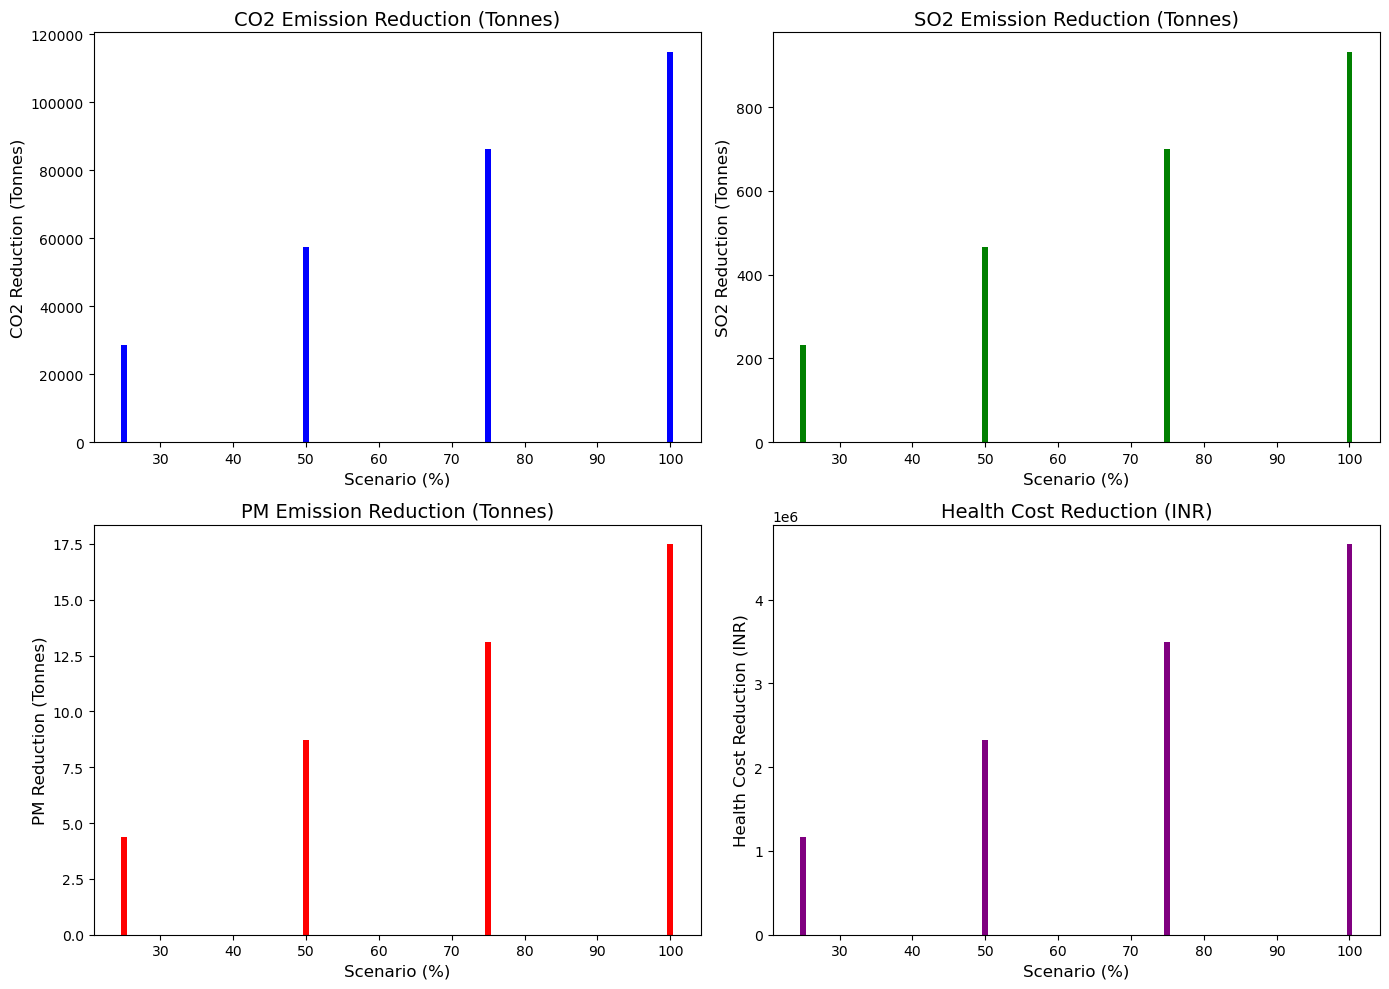

In [16]:
# Input Data
coal_emission_factor_co2 = 1000  # kg CO2/MWh
coal_emission_factor_so2 = 8     # kg SO2/MWh
coal_emission_factor_pm = 0.15   # kg PM/MWh

nuclear_emission_factor_co2 = 15 # kg CO2/MWh (nuclear operational CO2)
nuclear_emission_factor_so2 = 0  # kg SO2/MWh
nuclear_emission_factor_pm = 0   # kg PM/MWh

health_cost_coal = 0.04  # INR/kWh for health costs from coal (respiratory issues, premature deaths)

# Replacement Scenarios (25%, 50%, 75%, 100%)
replacement_scenarios = [0.25, 0.5, 0.75, 1.0]  # 25%, 50%, 75%, 100% replacement
coal_generation_base = 116520  # GWh/year (coal baseline)

# Simulation Function for Environmental Impact
def simulate_environmental_impact(scenarios, coal_gen, co2_factor_coal, so2_factor_coal, pm_factor_coal, co2_factor_nuclear, so2_factor_nuclear, pm_factor_nuclear, health_cost):
    results = {
        "Scenario (%)": [], 
        "CO2 Emission Reduction (Tonnes)": [], 
        "SO2 Emission Reduction (Tonnes)": [], 
        "PM Emission Reduction (Tonnes)": [], 
        "Health Cost Reduction (INR)": [],
        "Air Quality Improvement (PM reduction in kg)": []
    }
    
    for scenario in scenarios:
        # Calculate the amount of coal generation replaced by nuclear
        coal_energy_replaced = coal_gen * scenario
        nuclear_energy_added = coal_energy_replaced
        
        # Calculate emission reductions for CO2, SO2, and PM
        co2_reduction = coal_energy_replaced * (co2_factor_coal - co2_factor_nuclear) / 1000  # Convert to tonnes
        so2_reduction = coal_energy_replaced * (so2_factor_coal - so2_factor_nuclear) / 1000  # Convert to tonnes
        pm_reduction = coal_energy_replaced * (pm_factor_coal - pm_factor_nuclear) / 1000  # Convert to tonnes
        
        # Health cost reduction (based on kWh of coal replaced)
        health_cost_reduction = coal_energy_replaced * health_cost * 1000  # Convert to INR
        
        # Air Quality Improvement (based on PM reduction)
        air_quality_improvement = coal_energy_replaced * (pm_factor_coal - pm_factor_nuclear)  # kg reduction
        
        # Store results
        results["Scenario (%)"].append(int(scenario * 100))
        results["CO2 Emission Reduction (Tonnes)"].append(co2_reduction)
        results["SO2 Emission Reduction (Tonnes)"].append(so2_reduction)
        results["PM Emission Reduction (Tonnes)"].append(pm_reduction)
        results["Health Cost Reduction (INR)"].append(health_cost_reduction)
        results["Air Quality Improvement (PM reduction in kg)"].append(air_quality_improvement)
    
    return pd.DataFrame(results)

# Run Environmental Impact Simulation
env_impact_results = simulate_environmental_impact(
    replacement_scenarios, coal_generation_base, coal_emission_factor_co2, coal_emission_factor_so2, coal_emission_factor_pm,
    nuclear_emission_factor_co2, nuclear_emission_factor_so2, nuclear_emission_factor_pm, health_cost_coal
)

# Display Results
print(env_impact_results)

# Plot Environmental Impact Results
def plot_environmental_impact(df):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # CO2 Reduction
    axes[0, 0].bar(df["Scenario (%)"], df["CO2 Emission Reduction (Tonnes)"], color="blue")
    axes[0, 0].set_title("CO2 Emission Reduction (Tonnes)", fontsize=14)
    axes[0, 0].set_xlabel("Scenario (%)", fontsize=12)
    axes[0, 0].set_ylabel("CO2 Reduction (Tonnes)", fontsize=12)
    
    # SO2 Reduction
    axes[0, 1].bar(df["Scenario (%)"], df["SO2 Emission Reduction (Tonnes)"], color="green")
    axes[0, 1].set_title("SO2 Emission Reduction (Tonnes)", fontsize=14)
    axes[0, 1].set_xlabel("Scenario (%)", fontsize=12)
    axes[0, 1].set_ylabel("SO2 Reduction (Tonnes)", fontsize=12)
    
    # PM Reduction
    axes[1, 0].bar(df["Scenario (%)"], df["PM Emission Reduction (Tonnes)"], color="red")
    axes[1, 0].set_title("PM Emission Reduction (Tonnes)", fontsize=14)
    axes[1, 0].set_xlabel("Scenario (%)", fontsize=12)
    axes[1, 0].set_ylabel("PM Reduction (Tonnes)", fontsize=12)
    
    # Health Cost Reduction
    axes[1, 1].bar(df["Scenario (%)"], df["Health Cost Reduction (INR)"], color="purple")
    axes[1, 1].set_title("Health Cost Reduction (INR)", fontsize=14)
    axes[1, 1].set_xlabel("Scenario (%)", fontsize=12)
    axes[1, 1].set_ylabel("Health Cost Reduction (INR)", fontsize=12)

    plt.tight_layout()
    plt.show()

# Visualize Environmental Impact Results
plot_environmental_impact(env_impact_results)


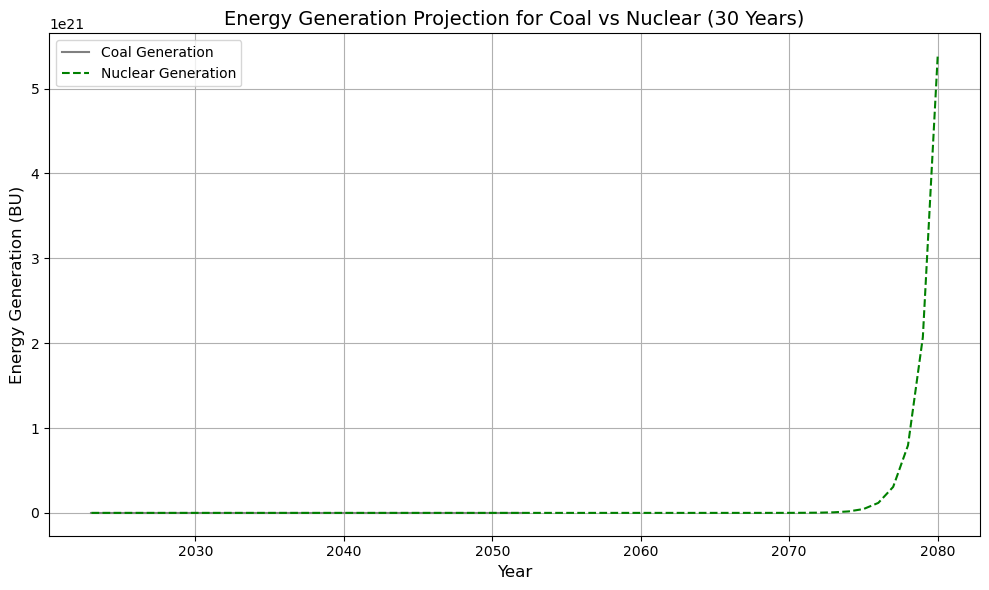

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Input Data
coal_capacity = 204000  # GW (total installed coal capacity in India)
nuclear_capacity_current = 6.78  # GW (current installed nuclear capacity in India)
target_nuclear_capacity_2050 = 50  # GW (India's nuclear target by 2050)
growth_rate = 0.07  # Energy demand growth rate (7% per year)

# Energy Production Models
def energy_generation_model(capacity, capacity_factor, years, growth_rate, base_generation):
    # Calculate energy production for each year
    yearly_generation = []
    for year in range(years):
        annual_generation = base_generation * (1 + growth_rate) ** year * capacity_factor
        yearly_generation.append(annual_generation)
        base_generation = annual_generation  # Update base generation for next year
    return yearly_generation

# Simulate Energy Generation for Coal and Nuclear
years = 30  # 30 years of projection

# For Coal: Assume 65% capacity factor and starting generation of 584.59 BU (coal-based generation 2022-23)
coal_generation_base = 584.59  # BU (coal generation base in 2022-23)
coal_capacity_factor = 0.65
coal_generation = energy_generation_model(coal_capacity, coal_capacity_factor, years, growth_rate, coal_generation_base)

# For Nuclear: Assume 90% capacity factor and a starting generation of 0.05 BU (nuclear generation 2022-23)
nuclear_generation_base = 0.05  # BU (nuclear generation base in 2022-23)
nuclear_capacity_factor = 0.90
nuclear_generation = energy_generation_model(nuclear_capacity_current, nuclear_capacity_factor, years, growth_rate, nuclear_generation_base)

# Forecast nuclear generation for target 50 GW by 2050 (linear growth)
target_year = 2050
target_growth_rate = (target_nuclear_capacity_2050 - nuclear_capacity_current) / (target_year - 2023)
for year in range(2023, target_year + 1):
    nuclear_generation.append(nuclear_generation[-1] * (1 + target_growth_rate))

# Plot Energy Generation Comparison (Coal vs Nuclear)
plt.figure(figsize=(10, 6))
plt.plot(range(2023, 2023 + years), coal_generation, label="Coal Generation", color='grey')
plt.plot(range(2023, 2023 + len(nuclear_generation)), nuclear_generation, label="Nuclear Generation", color='green', linestyle='--')

plt.title("Energy Generation Projection for Coal vs Nuclear (30 Years)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Energy Generation (BU)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


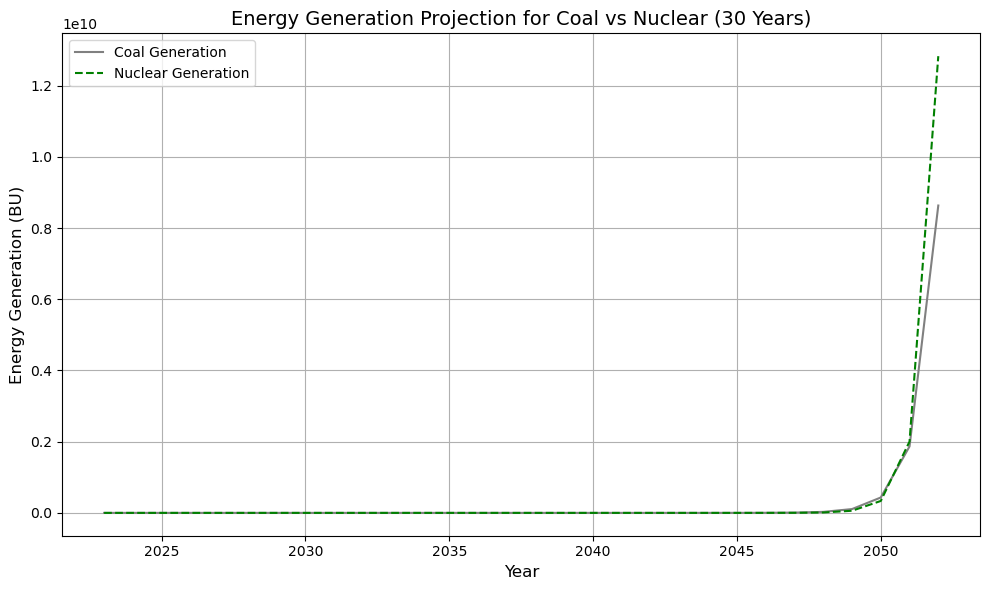

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Input Data
coal_capacity = 204000  # GW (total installed coal capacity in India)
nuclear_capacity_current = 6.78  # GW (current installed nuclear capacity in India)
target_nuclear_capacity_2050 = 50  # GW (India's nuclear target by 2050)
growth_rate = 0.07  # Energy demand growth rate (7% per year)
years = 30  # 30 years of projection

# Energy Production Models
def energy_generation_model(capacity, capacity_factor, years, growth_rate, base_generation, target_capacity=None, target_year=None):
    # Calculate energy production for each year
    yearly_generation = []
    for year in range(years):
        if target_capacity and target_year and year + 2023 <= target_year:
            # Gradually increase nuclear capacity towards target (linear growth)
            capacity = nuclear_capacity_current + (target_capacity - nuclear_capacity_current) * (year + 2023 - 2023) / (target_year - 2023)
        
        annual_generation = base_generation * (1 + growth_rate) ** year * capacity_factor
        yearly_generation.append(annual_generation)
        base_generation = annual_generation  # Update base generation for next year
    return yearly_generation

# For Coal: Assume 65% capacity factor and starting generation of 584.59 BU (coal-based generation 2022-23)
coal_generation_base = 584.59  # BU (coal generation base in 2022-23)
coal_capacity_factor = 0.65
coal_generation = energy_generation_model(coal_capacity, coal_capacity_factor, years, growth_rate, coal_generation_base)

# For Nuclear: Assume 90% capacity factor and a starting generation of 0.05 BU (nuclear generation 2022-23)
nuclear_generation_base = 0.05  # BU (nuclear generation base in 2022-23)
nuclear_capacity_factor = 0.90
nuclear_generation = energy_generation_model(nuclear_capacity_current, nuclear_capacity_factor, years, growth_rate, nuclear_generation_base, target_nuclear_capacity_2050, 2050)

# Plot Energy Generation Comparison (Coal vs Nuclear)
plt.figure(figsize=(10, 6))
plt.plot(range(2023, 2023 + years), coal_generation, label="Coal Generation", color='grey')
plt.plot(range(2023, 2023 + len(nuclear_generation)), nuclear_generation, label="Nuclear Generation", color='green', linestyle='--')

plt.title("Energy Generation Projection for Coal vs Nuclear (30 Years)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Energy Generation (BU)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


           Region  Scenario (%)  Coal Jobs Lost  Nuclear Jobs Created  \
0        Northern            25           2.700                0.1150   
1        Northern            50           5.400                0.2300   
2        Northern            75           8.100                0.3450   
3        Northern           100          10.800                0.4600   
4         Western            25           2.500                0.0625   
5         Western            50           5.000                0.1250   
6         Western            75           7.500                0.1875   
7         Western           100          10.000                0.2500   
8        Southern            25           1.500                0.0550   
9        Southern            50           3.000                0.1100   
10       Southern            75           4.500                0.1650   
11       Southern           100           6.000                0.2200   
12        Eastern            25           2.295    

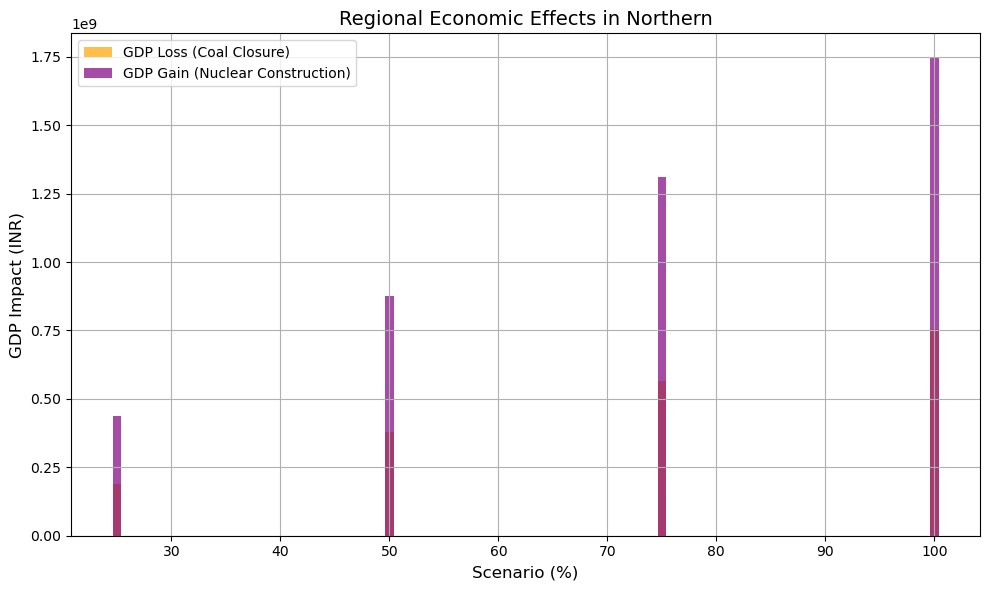

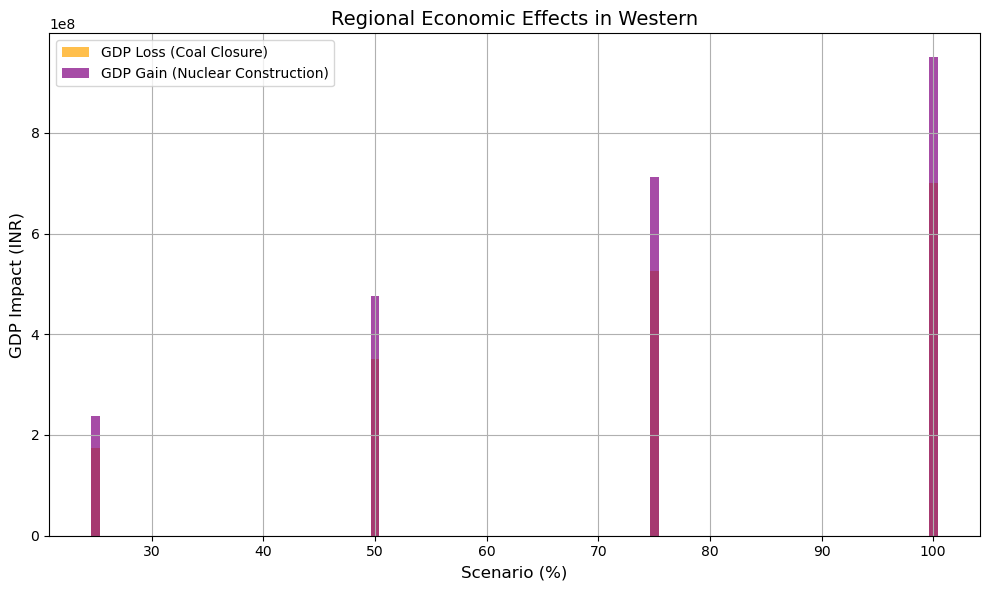

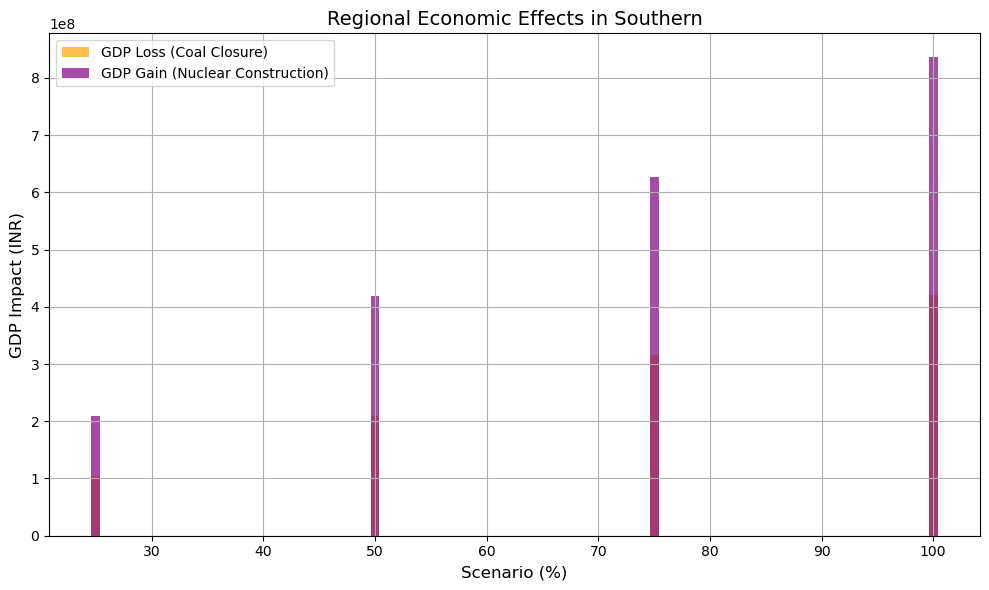

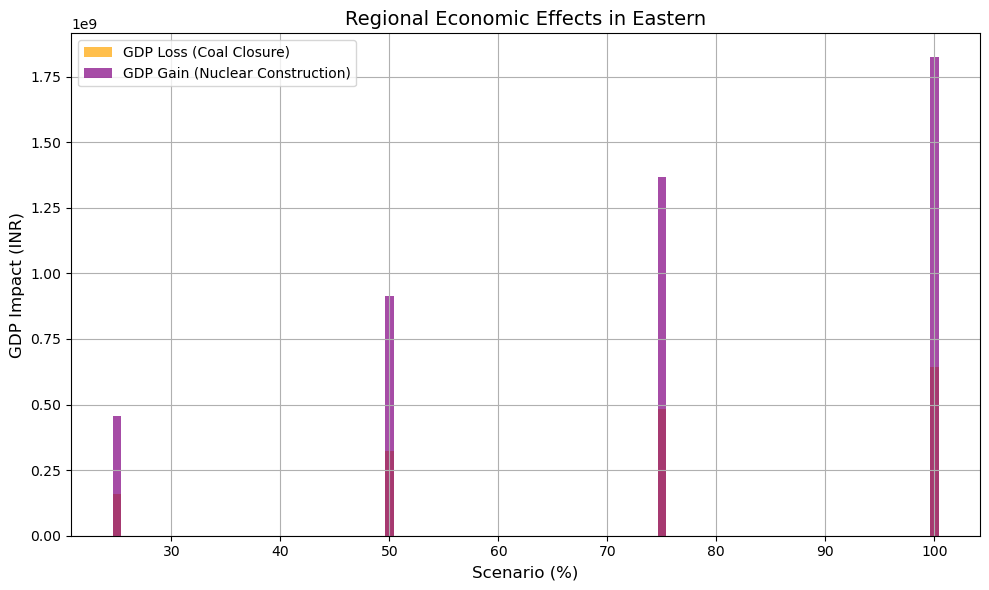

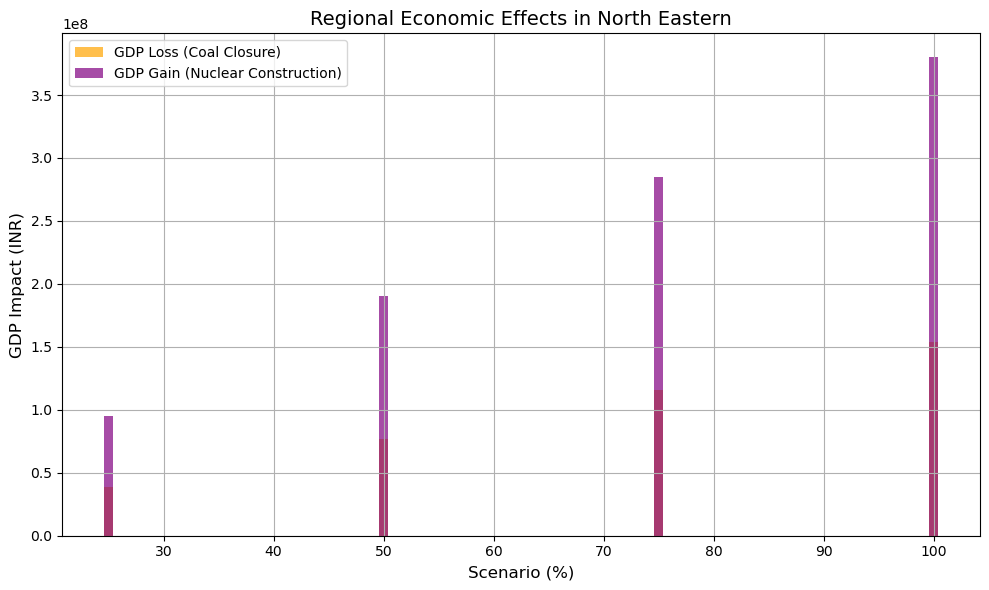

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Input Data for Regional Economic Effects
regions = ["Northern", "Western", "Southern", "Eastern", "North Eastern"]
coal_capacity_per_region = {"Northern": 60, "Western": 50, "Southern": 40, "Eastern": 54, "North Eastern": 10}  # GW
nuclear_capacity_per_region = {"Northern": 2, "Western": 1, "Southern": 1, "Eastern": 2, "North Eastern": 0.5}  # GW
coal_job_density = {"Northern": 0.18, "Western": 0.20, "Southern": 0.15, "Eastern": 0.17, "North Eastern": 0.22}  # Jobs/GWh
nuclear_job_density = {"Northern": 0.23, "Western": 0.25, "Southern": 0.22, "Eastern": 0.24, "North Eastern": 0.20}  # Jobs/GWh

# GDP Impact Data (estimated loss/gain per plant)
gdp_loss_per_coal_plant = 7 * 10**7  # INR per coal plant closure
gdp_gain_per_nuclear_plant = 3.8 * 10**9  # INR per nuclear plant construction

# Replacement Scenarios (25%, 50%, 75%, 100%)
replacement_scenarios = [0.25, 0.5, 0.75, 1.0]

# Function to Simulate Regional Economic Effects
def simulate_regional_economic_effects(regions, coal_capacity, nuclear_capacity, coal_job_density, nuclear_job_density, gdp_loss, gdp_gain, scenarios):
    results = {
        "Region": [],
        "Scenario (%)": [],
        "Coal Jobs Lost": [],
        "Nuclear Jobs Created": [],
        "Net Jobs": [],
        "GDP Loss (INR)": [],
        "GDP Gain (INR)": []
    }
    
    for region in regions:
        for scenario in scenarios:
            coal_energy_replaced = coal_capacity[region] * scenario  # GW of coal replaced
            nuclear_energy_added = nuclear_capacity[region] * scenario  # GW of nuclear added
            
            # Jobs
            coal_jobs_lost = coal_energy_replaced * coal_job_density[region]
            nuclear_jobs_created = nuclear_energy_added * nuclear_job_density[region]
            net_jobs = nuclear_jobs_created - coal_jobs_lost
            
            # GDP Impact
            gdp_loss_total = coal_jobs_lost * gdp_loss
            gdp_gain_total = nuclear_jobs_created * gdp_gain
            
            # Append results
            results["Region"].append(region)
            results["Scenario (%)"].append(int(scenario * 100))
            results["Coal Jobs Lost"].append(coal_jobs_lost)
            results["Nuclear Jobs Created"].append(nuclear_jobs_created)
            results["Net Jobs"].append(net_jobs)
            results["GDP Loss (INR)"].append(gdp_loss_total)
            results["GDP Gain (INR)"].append(gdp_gain_total)
    
    return pd.DataFrame(results)

# Run the Simulation
regional_results = simulate_regional_economic_effects(
    regions, coal_capacity_per_region, nuclear_capacity_per_region, coal_job_density, nuclear_job_density,
    gdp_loss_per_coal_plant, gdp_gain_per_nuclear_plant, replacement_scenarios
)

# Display the Results using Pandas
print(regional_results)

# Visualization
def plot_regional_effects(df, region):
    region_data = df[df["Region"] == region]
    plt.figure(figsize=(10, 6))
    
    plt.bar(region_data["Scenario (%)"], region_data["GDP Loss (INR)"], label="GDP Loss (Coal Closure)", color="orange", alpha=0.7)
    plt.bar(region_data["Scenario (%)"], region_data["GDP Gain (INR)"], label="GDP Gain (Nuclear Construction)", color="purple", alpha=0.7)
    
    plt.title(f"Regional Economic Effects in {region}", fontsize=14)
    plt.xlabel("Scenario (%)", fontsize=12)
    plt.ylabel("GDP Impact (INR)", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Plot for Each Region
for region in regions:
    plot_regional_effects(regional_results, region)


Regional Economic Effects Simulation Results:
           Region  Scenario (%)  Coal Jobs Lost  Nuclear Jobs Created  \
0        Northern            25           2.700                0.1150   
1        Northern            50           5.400                0.2300   
2        Northern            75           8.100                0.3450   
3        Northern           100          10.800                0.4600   
4         Western            25           2.500                0.0625   
5         Western            50           5.000                0.1250   
6         Western            75           7.500                0.1875   
7         Western           100          10.000                0.2500   
8        Southern            25           1.500                0.0550   
9        Southern            50           3.000                0.1100   
10       Southern            75           4.500                0.1650   
11       Southern           100           6.000                0.2200   
12   

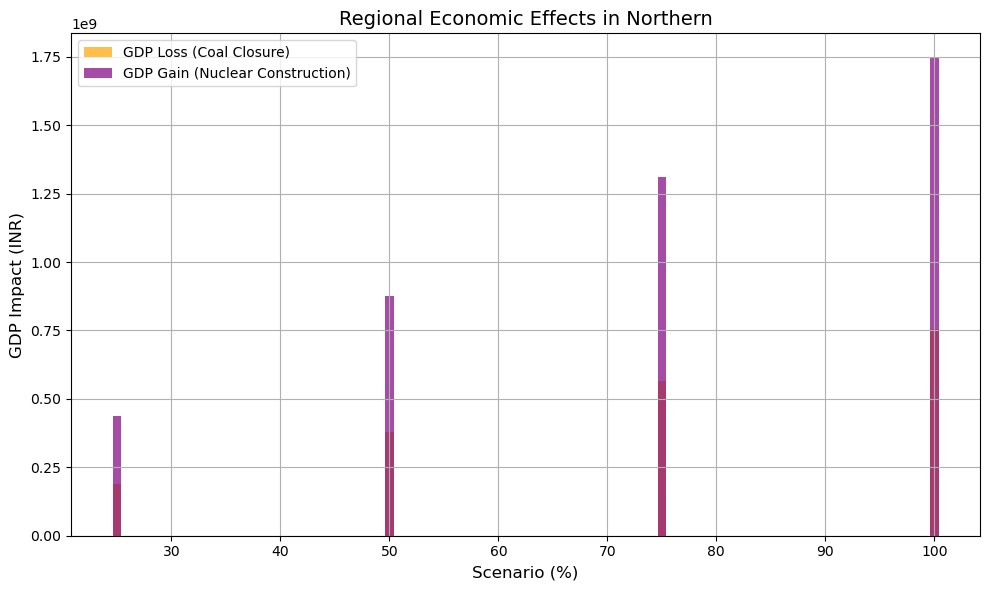

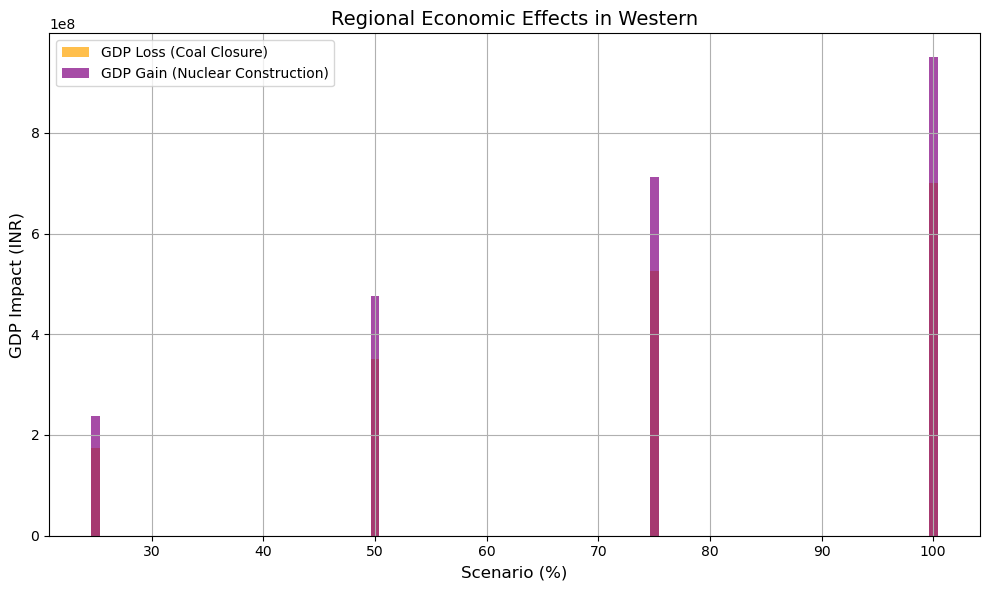

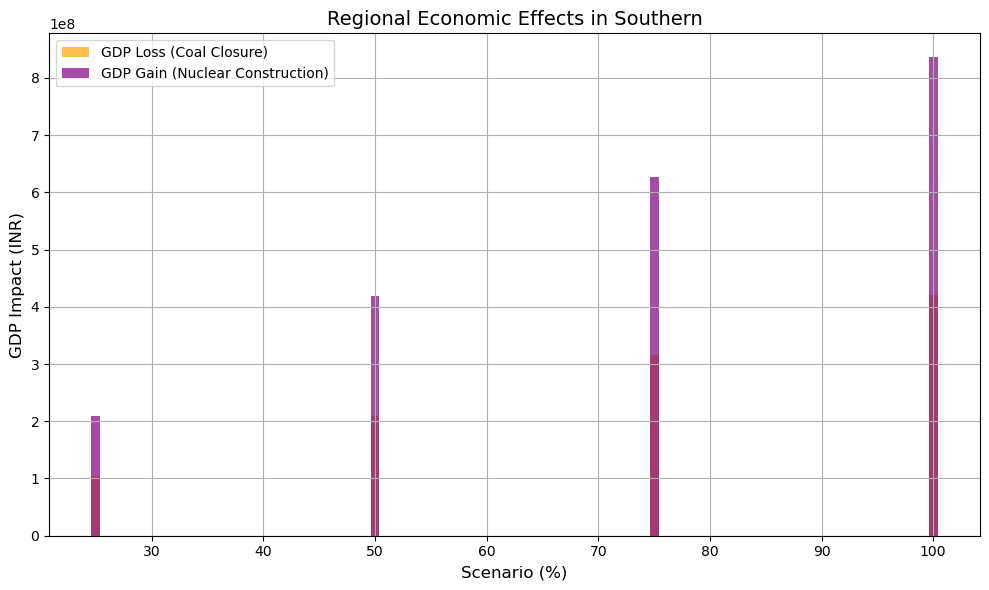

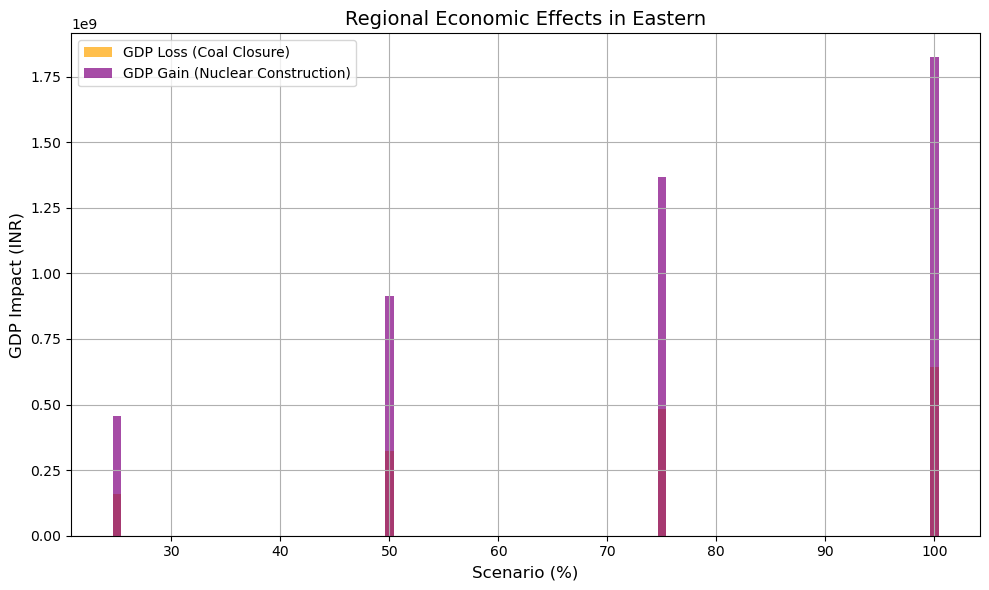

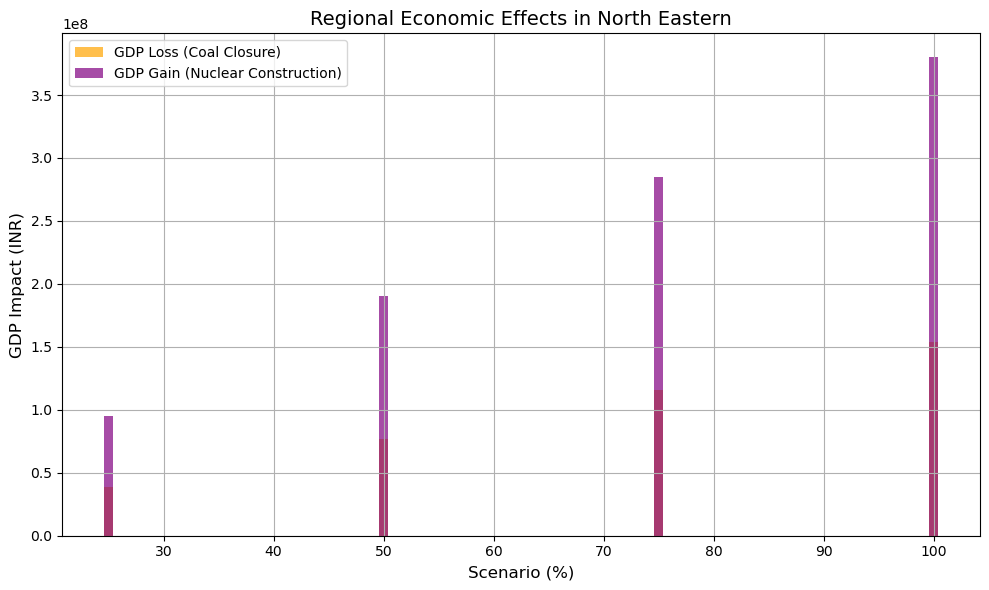

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Input Data for Regional Economic Effects
regions = ["Northern", "Western", "Southern", "Eastern", "North Eastern"]
coal_capacity_per_region = {"Northern": 60, "Western": 50, "Southern": 40, "Eastern": 54, "North Eastern": 10}  # GW
nuclear_capacity_per_region = {"Northern": 2, "Western": 1, "Southern": 1, "Eastern": 2, "North Eastern": 0.5}  # GW
coal_job_density = {"Northern": 0.18, "Western": 0.20, "Southern": 0.15, "Eastern": 0.17, "North Eastern": 0.22}  # Jobs/GWh
nuclear_job_density = {"Northern": 0.23, "Western": 0.25, "Southern": 0.22, "Eastern": 0.24, "North Eastern": 0.20}  # Jobs/GWh

# GDP Impact Data (estimated loss/gain per plant)
gdp_loss_per_coal_plant = 7 * 10**7  # INR per coal plant closure
gdp_gain_per_nuclear_plant = 3.8 * 10**9  # INR per nuclear plant construction

# Replacement Scenarios (25%, 50%, 75%, 100%)
replacement_scenarios = [0.25, 0.5, 0.75, 1.0]

# Function to Simulate Regional Economic Effects
def simulate_regional_economic_effects(regions, coal_capacity, nuclear_capacity, coal_job_density, nuclear_job_density, gdp_loss, gdp_gain, scenarios):
    results = {
        "Region": [],
        "Scenario (%)": [],
        "Coal Jobs Lost": [],
        "Nuclear Jobs Created": [],
        "Net Jobs": [],
        "GDP Loss (INR)": [],
        "GDP Gain (INR)": []
    }
    
    for region in regions:
        for scenario in scenarios:
            coal_energy_replaced = coal_capacity[region] * scenario  # GW of coal replaced
            nuclear_energy_added = nuclear_capacity[region] * scenario  # GW of nuclear added
            
            # Jobs
            coal_jobs_lost = coal_energy_replaced * coal_job_density[region]
            nuclear_jobs_created = nuclear_energy_added * nuclear_job_density[region]
            net_jobs = nuclear_jobs_created - coal_jobs_lost
            
            # GDP Impact
            gdp_loss_total = coal_jobs_lost * gdp_loss
            gdp_gain_total = nuclear_jobs_created * gdp_gain
            
            # Append results
            results["Region"].append(region)
            results["Scenario (%)"].append(int(scenario * 100))
            results["Coal Jobs Lost"].append(coal_jobs_lost)
            results["Nuclear Jobs Created"].append(nuclear_jobs_created)
            results["Net Jobs"].append(net_jobs)
            results["GDP Loss (INR)"].append(gdp_loss_total)
            results["GDP Gain (INR)"].append(gdp_gain_total)
    
    return pd.DataFrame(results)

# Run the Simulation
regional_results = simulate_regional_economic_effects(
    regions, coal_capacity_per_region, nuclear_capacity_per_region, coal_job_density, nuclear_job_density,
    gdp_loss_per_coal_plant, gdp_gain_per_nuclear_plant, replacement_scenarios
)

# Display the Results
print("Regional Economic Effects Simulation Results:")
print(regional_results)

# Visualization Function (Fixed for Region-Specific Data)
def plot_regional_effects(df):
    regions = df["Region"].unique()
    for region in regions:
        region_data = df[df["Region"] == region]
        plt.figure(figsize=(10, 6))
        
        # Ensure filtering is correct for each region
        plt.bar(region_data["Scenario (%)"], region_data["GDP Loss (INR)"], label="GDP Loss (Coal Closure)", color="orange", alpha=0.7)
        plt.bar(region_data["Scenario (%)"], region_data["GDP Gain (INR)"], label="GDP Gain (Nuclear Construction)", color="purple", alpha=0.7)
        
        plt.title(f"Regional Economic Effects in {region}", fontsize=14)
        plt.xlabel("Scenario (%)", fontsize=12)
        plt.ylabel("GDP Impact (INR)", fontsize=12)
        plt.legend(fontsize=10)
        plt.grid()
        plt.tight_layout()
        plt.show()

# Plot for Each Region
plot_regional_effects(regional_results)


Regional Economic Effects Simulation Results:
           Region  Scenario (%)  Coal Jobs Lost  Nuclear Jobs Created  \
0        Northern            25           2.700                0.1150   
1        Northern            50           5.400                0.2300   
2        Northern            75           8.100                0.3450   
3        Northern           100          10.800                0.4600   
4         Western            25           2.500                0.0625   
5         Western            50           5.000                0.1250   
6         Western            75           7.500                0.1875   
7         Western           100          10.000                0.2500   
8        Southern            25           1.500                0.0550   
9        Southern            50           3.000                0.1100   
10       Southern            75           4.500                0.1650   
11       Southern           100           6.000                0.2200   
12   

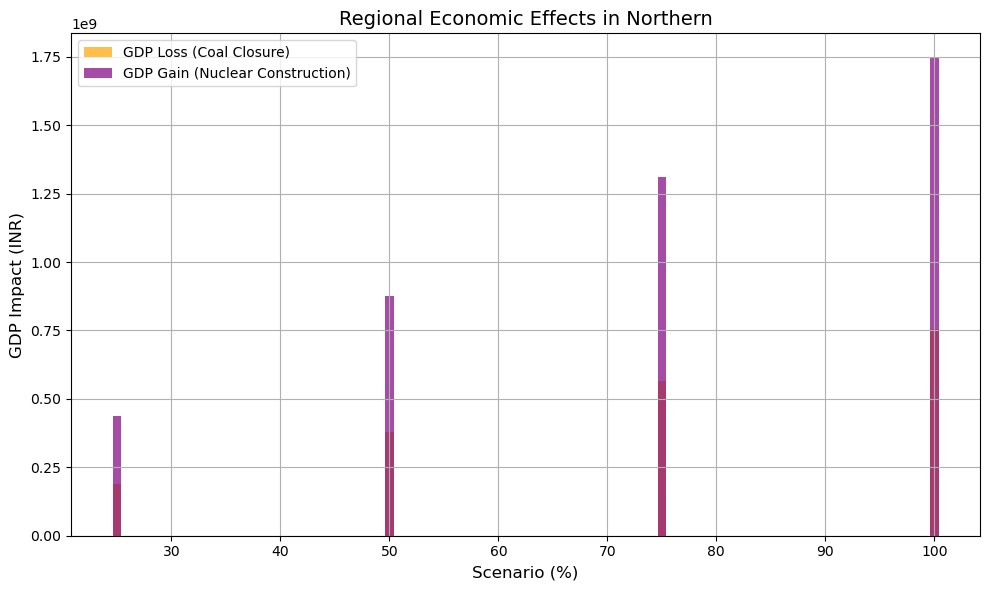


Filtered Data for Western:
     Region  Scenario (%)  Coal Jobs Lost  Nuclear Jobs Created  Net Jobs  \
4  Western            25             2.5                0.0625   -2.4375   
5  Western            50             5.0                0.1250   -4.8750   
6  Western            75             7.5                0.1875   -7.3125   
7  Western           100            10.0                0.2500   -9.7500   

   GDP Loss (INR)  GDP Gain (INR)  
4     175000000.0     237500000.0  
5     350000000.0     475000000.0  
6     525000000.0     712500000.0  
7     700000000.0     950000000.0  


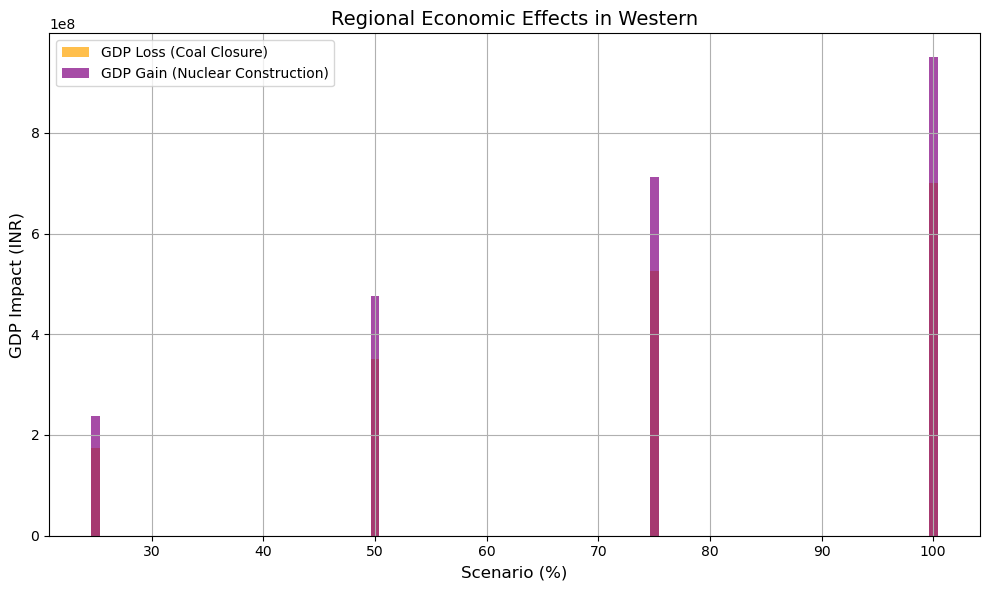


Filtered Data for Southern:
       Region  Scenario (%)  Coal Jobs Lost  Nuclear Jobs Created  Net Jobs  \
8   Southern            25             1.5                 0.055    -1.445   
9   Southern            50             3.0                 0.110    -2.890   
10  Southern            75             4.5                 0.165    -4.335   
11  Southern           100             6.0                 0.220    -5.780   

    GDP Loss (INR)  GDP Gain (INR)  
8      105000000.0     209000000.0  
9      210000000.0     418000000.0  
10     315000000.0     627000000.0  
11     420000000.0     836000000.0  


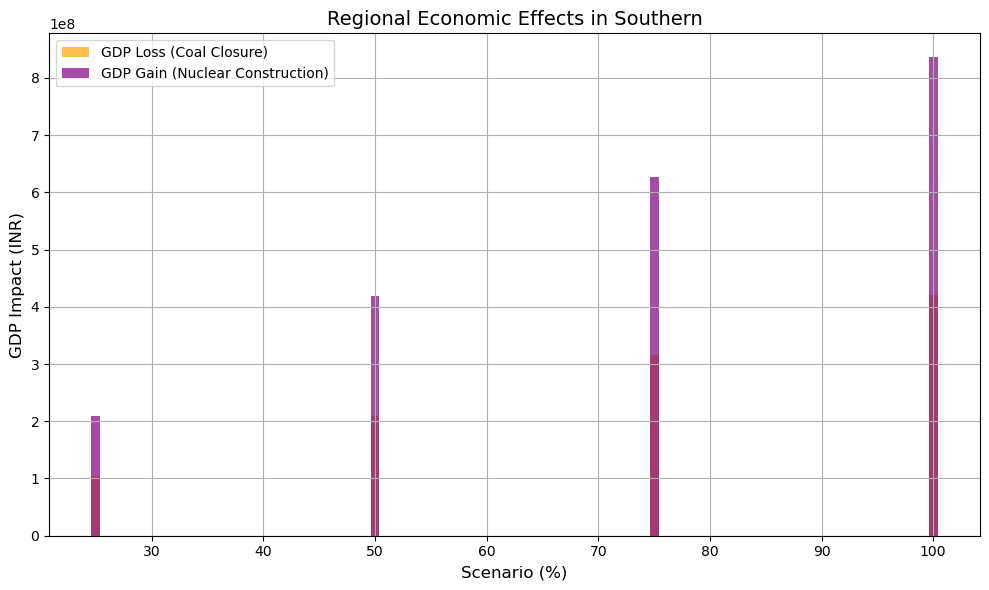


Filtered Data for Eastern:
      Region  Scenario (%)  Coal Jobs Lost  Nuclear Jobs Created  Net Jobs  \
12  Eastern            25           2.295                  0.12    -2.175   
13  Eastern            50           4.590                  0.24    -4.350   
14  Eastern            75           6.885                  0.36    -6.525   
15  Eastern           100           9.180                  0.48    -8.700   

    GDP Loss (INR)  GDP Gain (INR)  
12     160650000.0    4.560000e+08  
13     321300000.0    9.120000e+08  
14     481950000.0    1.368000e+09  
15     642600000.0    1.824000e+09  


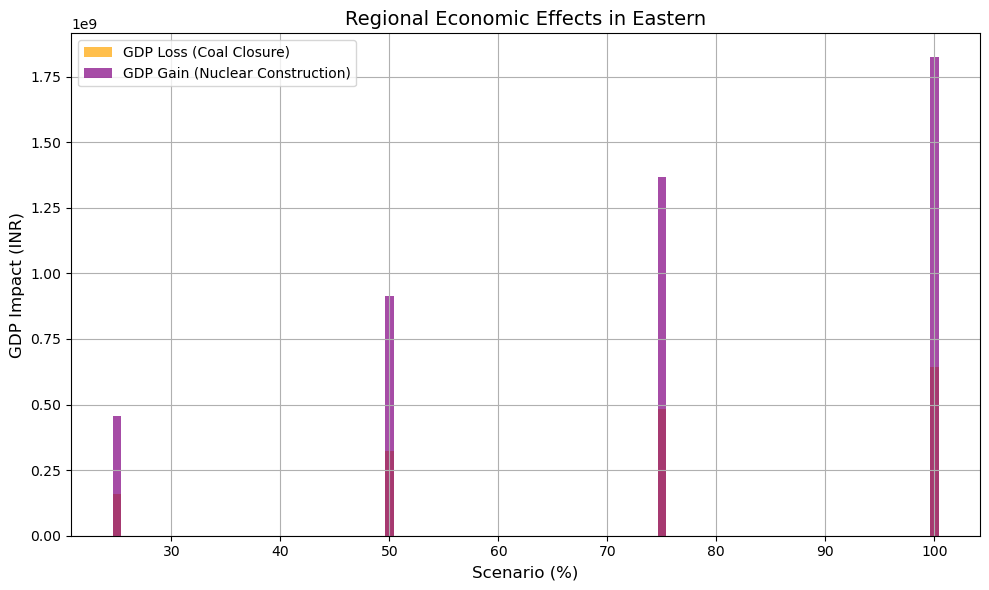


Filtered Data for North Eastern:
            Region  Scenario (%)  Coal Jobs Lost  Nuclear Jobs Created  \
16  North Eastern            25            0.55                 0.025   
17  North Eastern            50            1.10                 0.050   
18  North Eastern            75            1.65                 0.075   
19  North Eastern           100            2.20                 0.100   

    Net Jobs  GDP Loss (INR)  GDP Gain (INR)  
16    -0.525      38500000.0      95000000.0  
17    -1.050      77000000.0     190000000.0  
18    -1.575     115500000.0     285000000.0  
19    -2.100     154000000.0     380000000.0  


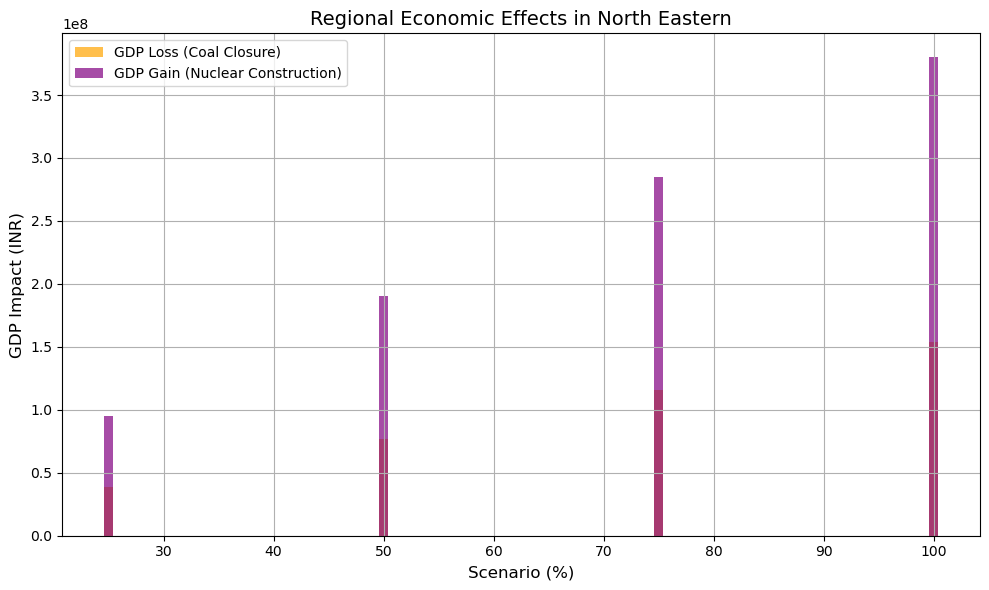

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Input Data for Regional Economic Effects
regions = ["Northern", "Western", "Southern", "Eastern", "North Eastern"]
coal_capacity_per_region = {"Northern": 60, "Western": 50, "Southern": 40, "Eastern": 54, "North Eastern": 10}  # GW
nuclear_capacity_per_region = {"Northern": 2, "Western": 1, "Southern": 1, "Eastern": 2, "North Eastern": 0.5}  # GW
coal_job_density = {"Northern": 0.18, "Western": 0.20, "Southern": 0.15, "Eastern": 0.17, "North Eastern": 0.22}  # Jobs/GWh
nuclear_job_density = {"Northern": 0.23, "Western": 0.25, "Southern": 0.22, "Eastern": 0.24, "North Eastern": 0.20}  # Jobs/GWh

# GDP Impact Data (estimated loss/gain per plant)
gdp_loss_per_coal_plant = 7 * 10**7  # INR per coal plant closure
gdp_gain_per_nuclear_plant = 3.8 * 10**9  # INR per nuclear plant construction

# Replacement Scenarios (25%, 50%, 75%, 100%)
replacement_scenarios = [0.25, 0.5, 0.75, 1.0]

# Function to Simulate Regional Economic Effects
def simulate_regional_economic_effects(regions, coal_capacity, nuclear_capacity, coal_job_density, nuclear_job_density, gdp_loss, gdp_gain, scenarios):
    results = []

    for region in regions:
        for scenario in scenarios:
            coal_energy_replaced = coal_capacity[region] * scenario  # GW of coal replaced
            nuclear_energy_added = nuclear_capacity[region] * scenario  # GW of nuclear added
            
            # Jobs
            coal_jobs_lost = coal_energy_replaced * coal_job_density[region]
            nuclear_jobs_created = nuclear_energy_added * nuclear_job_density[region]
            net_jobs = nuclear_jobs_created - coal_jobs_lost
            
            # GDP Impact
            gdp_loss_total = coal_jobs_lost * gdp_loss
            gdp_gain_total = nuclear_jobs_created * gdp_gain
            
            # Append results as a dictionary
            results.append({
                "Region": region,
                "Scenario (%)": int(scenario * 100),
                "Coal Jobs Lost": coal_jobs_lost,
                "Nuclear Jobs Created": nuclear_jobs_created,
                "Net Jobs": net_jobs,
                "GDP Loss (INR)": gdp_loss_total,
                "GDP Gain (INR)": gdp_gain_total
            })
    
    return pd.DataFrame(results)

# Run the Simulation
regional_results = simulate_regional_economic_effects(
    regions, coal_capacity_per_region, nuclear_capacity_per_region, coal_job_density, nuclear_job_density,
    gdp_loss_per_coal_plant, gdp_gain_per_nuclear_plant, replacement_scenarios
)

# Display the Results
print("Regional Economic Effects Simulation Results:")
print(regional_results)

# Visualization Function (Fixed for Region-Specific Data)
def plot_regional_effects(df):
    regions = df["Region"].unique()
    for region in regions:
        # Filter data for the current region
        region_data = df[df["Region"] == region]
        
        # Check the filtered data
        print(f"\nFiltered Data for {region}:\n", region_data)
        
        plt.figure(figsize=(10, 6))
        plt.bar(region_data["Scenario (%)"], region_data["GDP Loss (INR)"], label="GDP Loss (Coal Closure)", color="orange", alpha=0.7)
        plt.bar(region_data["Scenario (%)"], region_data["GDP Gain (INR)"], label="GDP Gain (Nuclear Construction)", color="purple", alpha=0.7)
        
        plt.title(f"Regional Economic Effects in {region}", fontsize=14)
        plt.xlabel("Scenario (%)", fontsize=12)
        plt.ylabel("GDP Impact (INR)", fontsize=12)
        plt.legend(fontsize=10)
        plt.grid()
        plt.tight_layout()
        plt.show()

# Plot for Each Region
plot_regional_effects(regional_results)
